# Student Anxiety Prediction

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [230]:
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\PRACTICE\archive (2)\anxiety.csv", encoding='latin-1')
data


S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0           1  42052.00437     0     0     0     0     1     0     0   
1           2  42052.00680     1     2     2     2     0     1     0   
2           3  42052.03860     0     2     2     0     0     3     1   
3           4  42052.06804     0     0     0     0     0     0     0   
4           5  42052.08948     2     1     2     2     2     3     2   
...       ...          ...   ...   ...   ...   ...   ...   ...   ...   
13459   14246  42057.75678     1     0     0     1     0     1     1   
13460   14247  42057.81185     3     3     3     3     2     3     3   
13461   14248  42058.16964     0     0     0     0     0     0     0   
13462   14249  42058.24420     3     2     1     3     0     1     3   
13463   14250  42058.36375     1     1     0     0     0     0     0   

                       GADE  ...  Birthplace    Residence  Reference  \
0      Not difficult at all  ...         USA          USA     Reddit   
1        Somewhat difficult  ...         USA          USA     Reddit   
2      Not difficult at all  ...     Germany      Germany     Reddit   
3      Not difficult at all  ...         USA          USA     Reddit   
4            Very difficult  ...         USA  South Korea     Reddit   
...                     ...  ...         ...          ...        ...   
13459  Not difficult at all  ...      France       France     Reddit   
13460   Extremely difficult  ...         USA          USA     Reddit   
13461  Not difficult at all  ...      Norway       Norway     Reddit   
13462    Somewhat difficult  ...      Canada       Canada     Reddit   
13463    Somewhat difficult  ...      Canada       Canada     Reddit   

                                               Playstyle  accept GAD_T SWL_T  \
0                                           Singleplayer  Accept     1    23   
1                  Multiplayer - online - with strangers  Accept     8    16   
2                                           Singleplayer  Accept     8    17   
3      Multiplayer - online - with online acquaintanc...  Accept     0    17   
4                  Multiplayer - online - with strangers  Accept    14    14   
...                                                  ...     ...   ...   ...   
13459              Multiplayer - online - with strangers  Accept     4    28   
13460              Multiplayer - online - with strangers  Accept    20    23   
13461      Multiplayer - online - with real life friends  Accept     0    32   
13462                                       Singleplayer  Accept    13    16   
13463              Multiplayer - online - with strangers  Accept     2    25   

       SPIN_T Residence_ISO3 Birthplace_ISO3  
0         5.0            USA             USA  
1        33.0            USA             USA  
2        31.0            DEU             DEU  
3        11.0            USA             USA  
4        13.0            KOR             USA  
...       ...            ...             ...  
13459     7.0            FRA             FRA  
13460    25.0            USA             USA  
13461    10.0            NOR             NOR  
13462    32.0            CAN             CAN  
13463    14.0            CAN             CAN  

[13464 rows x 55 columns]

In [231]:
data.head()

S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   

                   GADE  ...  Birthplace    Residence  Reference  \
0  Not difficult at all  ...         USA          USA     Reddit   
1    Somewhat difficult  ...         USA          USA     Reddit   
2  Not difficult at all  ...     Germany      Germany     Reddit   
3  Not difficult at all  ...         USA          USA     Reddit   
4        Very difficult  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T SWL_T  \
0                                       Singleplayer  Accept     1    23   
1              Multiplayer - online - with strangers  Accept     8    16   
2                                       Singleplayer  Accept     8    17   
3  Multiplayer - online - with online acquaintanc...  Accept     0    17   
4              Multiplayer - online - with strangers  Accept    14    14   

   SPIN_T Residence_ISO3 Birthplace_ISO3  
0     5.0            USA             USA  
1    33.0            USA             USA  
2    31.0            DEU             DEU  
3    11.0            USA             USA  
4    13.0            KOR             USA  

[5 rows x 55 columns]

In [232]:
data.tail()

S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
13459   14246  42057.75678     1     0     0     1     0     1     1   
13460   14247  42057.81185     3     3     3     3     2     3     3   
13461   14248  42058.16964     0     0     0     0     0     0     0   
13462   14249  42058.24420     3     2     1     3     0     1     3   
13463   14250  42058.36375     1     1     0     0     0     0     0   

                       GADE  ...  Birthplace  Residence  Reference  \
13459  Not difficult at all  ...      France     France     Reddit   
13460   Extremely difficult  ...         USA        USA     Reddit   
13461  Not difficult at all  ...      Norway     Norway     Reddit   
13462    Somewhat difficult  ...      Canada     Canada     Reddit   
13463    Somewhat difficult  ...      Canada     Canada     Reddit   

                                           Playstyle  accept GAD_T SWL_T  \
13459          Multiplayer - online - with strangers  Accept     4    28   
13460          Multiplayer - online - with strangers  Accept    20    23   
13461  Multiplayer - online - with real life friends  Accept     0    32   
13462                                   Singleplayer  Accept    13    16   
13463          Multiplayer - online - with strangers  Accept     2    25   

       SPIN_T Residence_ISO3 Birthplace_ISO3  
13459     7.0            FRA             FRA  
13460    25.0            USA             USA  
13461    10.0            NOR             NOR  
13462    32.0            CAN             CAN  
13463    14.0            CAN             CAN  

[5 rows x 55 columns]

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [234]:
data.GAD2

0        0
1        2
2        2
3        0
4        1
        ..
13459    0
13460    3
13461    0
13462    2
13463    1
Name: GAD2, Length: 13464, dtype: int64

In [235]:
data.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)

Summarize dataframe

In [236]:
data.describe()

GAD1          GAD2          GAD3          GAD4          GAD5  \
count  13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
mean       0.860963      0.673351      0.965761      0.724079      0.488042   
std        0.926542      0.915724      0.982776      0.921971      0.837014   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

               GAD6          GAD7          SWL1          SWL2         SWL3  \
count  13464.000000  13464.000000  13464.000000  13464.000000  13464.00000   
mean       0.911022      0.588755      3.720440      4.602050      4.34544   
std        0.931168      0.894408      1.736264      1.696276      1.80943   
min        0.000000      0.000000      1.000000      1.000000      1.00000   
25%        0.000000      0.000000      2.000000      3.000000      3.00000   
50%        1.000000      0.000000      4.000000      5.000000      5.00000   
75%        1.000000      1.000000      5.000000      6.000000      6.00000   
max        3.000000      3.000000      7.000000      7.000000      7.00000   

       ...        SPIN13        SPIN14        SPIN15        SPIN16  \
count  ...  13277.000000  13308.000000  13317.000000  13317.000000   
mean   ...      0.538827      1.252405      1.411054      0.620635   
std    ...      0.944180      1.207463      1.349874      0.961853   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      1.000000      1.000000      0.000000   
75%    ...      1.000000      2.000000      2.000000      1.000000   
max    ...      4.000000      4.000000      4.000000      4.000000   

             SPIN17    Narcissism           Age         GAD_T         SWL_T  \
count  13289.000000  13441.000000  13464.000000  13464.000000  13464.000000   
mean       0.935962      2.027677     20.930407      5.211973     19.788844   
std        1.180456      1.061842      3.300897      4.713267      7.229243   
min        0.000000      1.000000     18.000000      0.000000      5.000000   
25%        0.000000      1.000000     18.000000      2.000000     14.000000   
50%        0.000000      2.000000     20.000000      4.000000     20.000000   
75%        2.000000      3.000000     22.000000      8.000000     26.000000   
max        4.000000      5.000000     63.000000     21.000000     35.000000   

             SPIN_T  
count  12814.000000  
mean      19.848525  
std       13.467493  
min        0.000000  
25%        9.000000  
50%       17.000000  
75%       28.000000  
max       68.000000  

[8 rows x 37 columns]

In [237]:
data.describe().T

count       mean        std   min   25%   50%   75%     max
GAD1           13464.0   0.860963   0.926542   0.0   0.0   1.0   1.0     3.0
GAD2           13464.0   0.673351   0.915724   0.0   0.0   0.0   1.0     3.0
GAD3           13464.0   0.965761   0.982776   0.0   0.0   1.0   2.0     3.0
GAD4           13464.0   0.724079   0.921971   0.0   0.0   0.0   1.0     3.0
GAD5           13464.0   0.488042   0.837014   0.0   0.0   0.0   1.0     3.0
GAD6           13464.0   0.911022   0.931168   0.0   0.0   1.0   1.0     3.0
GAD7           13464.0   0.588755   0.894408   0.0   0.0   0.0   1.0     3.0
SWL1           13464.0   3.720440   1.736264   1.0   2.0   4.0   5.0     7.0
SWL2           13464.0   4.602050   1.696276   1.0   3.0   5.0   6.0     7.0
SWL3           13464.0   4.345440   1.809430   1.0   3.0   5.0   6.0     7.0
SWL4           13464.0   3.762032   1.818136   1.0   2.0   4.0   5.0     7.0
SWL5           13464.0   3.358883   1.916319   1.0   2.0   3.0   5.0     7.0
Hours          13434.0  22.247357  70.284502   0.0  12.0  20.0  28.0  8000.0
highestleague      0.0        NaN        NaN   NaN   NaN   NaN   NaN     NaN
streams        13364.0  11.233538  78.549209   0.0   4.0   8.0  15.0  9001.0
SPIN1          13340.0   0.856897   0.907351   0.0   0.0   1.0   1.0     4.0
SPIN2          13310.0   1.210969   1.144054   0.0   0.0   1.0   2.0     4.0
SPIN3          13324.0   1.095392   1.164982   0.0   0.0   1.0   2.0     4.0
SPIN4          13305.0   1.682976   1.229730   0.0   1.0   2.0   3.0     4.0
SPIN5          13298.0   1.248985   1.221828   0.0   0.0   1.0   2.0     4.0
SPIN6          13308.0   1.348287   1.279251   0.0   0.0   1.0   2.0     4.0
SPIN7          13326.0   1.050503   1.221171   0.0   0.0   1.0   2.0     4.0
SPIN8          13320.0   1.405030   1.372777   0.0   0.0   1.0   2.0     4.0
SPIN9          13306.0   1.567338   1.383539   0.0   0.0   1.0   3.0     4.0
SPIN10         13304.0   0.917769   1.125849   0.0   0.0   1.0   1.0     4.0
SPIN11         13277.0   1.827446   1.488372   0.0   0.0   2.0   3.0     4.0
SPIN12         13296.0   0.892148   1.158235   0.0   0.0   0.0   1.0     4.0
SPIN13         13277.0   0.538827   0.944180   0.0   0.0   0.0   1.0     4.0
SPIN14         13308.0   1.252405   1.207463   0.0   0.0   1.0   2.0     4.0
SPIN15         13317.0   1.411054   1.349874   0.0   0.0   1.0   2.0     4.0
SPIN16         13317.0   0.620635   0.961853   0.0   0.0   0.0   1.0     4.0
SPIN17         13289.0   0.935962   1.180456   0.0   0.0   0.0   2.0     4.0
Narcissism     13441.0   2.027677   1.061842   1.0   1.0   2.0   3.0     5.0
Age            13464.0  20.930407   3.300897  18.0  18.0  20.0  22.0    63.0
GAD_T          13464.0   5.211973   4.713267   0.0   2.0   4.0   8.0    21.0
SWL_T          13464.0  19.788844   7.229243   5.0  14.0  20.0  26.0    35.0
SPIN_T         12814.0  19.848525  13.467493   0.0   9.0  17.0  28.0    68.0

In [238]:
data.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
S

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [240]:
data.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


# Some values analysis

In [241]:
for i in data:
    print('-------------')
    print(data[i].value_counts().head(15))
    print('-------------')

-------------
0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
-------------
-------------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
-------------
-------------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
-------------
-------------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
-------------
-------------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
-------------
-------------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
-------------
-------------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
-------------
-------------
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64
-------------
-------------
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: SWL1, dtype: int64
-------------
-------------
6    3715
5    2869
4    1724
3    1660
2  

In [242]:
for i in data:
    print('------',i,'------')
    print(data[i].unique()[:30])
    print('-------------')

------ GAD1 ------
[0 1 2 3]
-------------
------ GAD2 ------
[0 2 1 3]
-------------
------ GAD3 ------
[0 2 3 1]
-------------
------ GAD4 ------
[0 2 3 1]
-------------
------ GAD5 ------
[1 0 2 3]
-------------
------ GAD6 ------
[0 1 3 2]
-------------
------ GAD7 ------
[0 1 2 3]
-------------
------ GADE ------
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
-------------
------ SWL1 ------
[3 2 5 7 6 1 4]
-------------
------ SWL2 ------
[5 6 2 4 3 7 1]
-------------
------ SWL3 ------
[5 2 4 3 6 7 1]
-------------
------ SWL4 ------
[5 2 3 6 1 7 4]
-------------
------ SWL5 ------
[5 1 2 3 7 6 4]
-------------
------ Game ------
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
-------------
------ Platform ------
['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
-------------
------ Hours ------
[15.  8.  0. 20.  4. 3

In [243]:
for i in data:
    print('------',i,'------')
    print(data[i].nunique())
    print('-------------')

------ GAD1 ------
4
-------------
------ GAD2 ------
4
-------------
------ GAD3 ------
4
-------------
------ GAD4 ------
4
-------------
------ GAD5 ------
4
-------------
------ GAD6 ------
4
-------------
------ GAD7 ------
4
-------------
------ GADE ------
4
-------------
------ SWL1 ------
7
-------------
------ SWL2 ------
7
-------------
------ SWL3 ------
7
-------------
------ SWL4 ------
7
-------------
------ SWL5 ------
7
-------------
------ Game ------
11
-------------
------ Platform ------
3
-------------
------ Hours ------
84
-------------
------ earnings ------
314
-------------
------ whyplay ------
407
-------------
------ League ------
1455
-------------
------ highestleague ------
0
-------------
------ streams ------
65
-------------
------ SPIN1 ------
5
-------------
------ SPIN2 ------
5
-------------
------ SPIN3 ------
5
-------------
------ SPIN4 ------
5
-------------
------ SPIN5 ------
5
-------------
------ SPIN6 ------
5
-------------
------ SPIN7 

Cleaning

In [244]:
data.shape

(13464, 53)

In [245]:
data['Hours_streams'] = data['Hours'] + data['streams']
data.drop(  ((data[data['Hours_streams'] > 115].index) | (data[data['Hours_streams']==0].index)),
                                             axis=0,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\1334814550.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  data.drop(  ((data[data['Hours_streams'] > 115].index) | (data[data['Hours_streams']==0].index)),


In [246]:
data['Hours_streams'].value_counts()

30.0     961
25.0     763
40.0     732
35.0     689
20.0     662
        ... 
99.0       1
87.0       1
81.0       1
94.0       1
109.0      1
Name: Hours_streams, Length: 108, dtype: int64

In [247]:
data.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5132
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [248]:
data.GADE.fillna(data.GADE.value_counts().index[1] , inplace=True)

In [249]:
data.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5780
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [250]:
data.shape

(13411, 54)

In [251]:
data.streams.fillna(int(data.streams.mean()) , inplace = True)
data.Hours.fillna(int(data.Hours.mean()) , inplace = True)

In [252]:
data.drop('Hours_streams' , axis = 1 , inplace = True)

In [253]:
print(data.League.nunique())
data.League = data.League.str.lower().str.strip()
print(data.League.nunique())

1444
1199


In [254]:
data["League"].value_counts().head(50)

gold            1347
silver           899
platinum         838
diamond          728
unranked         393
gold 3           265
gold 1           264
diamond 5        264
gold 5           263
silver 1         250
gold v           227
silver 2         219
gold 2           218
silver 3         199
bronze           191
platinum 3       159
gold 4           156
platinum 1       143
silver 4         138
platinum 2       138
platinum 5       128
silver 5         121
diamond v        110
platinum 4       102
plat             100
diamond 3         96
diamond 4         96
platinum v        89
plat 5            87
plat 3            84
gold iv           82
diamond 1         75
master            74
plat 2            72
gold iii          69
bronze 1          69
silver iii        68
plat 1            67
plat 4            62
diamond 2         61
silver v          59
silver iv         59
bronze 2          58
bronze 3          55
challenger        53
silver i          52
silver ii         50
platinum iii 

In [255]:
data["League"] =data["League"].str.extract(r'^([a-z]+)')

In [256]:
data.League.nunique()

207

In [257]:
data.League.unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'bad', 'legendary', 'global', 'potato', 'master',
       'silverii', 'platinum', 'masters', 'challenger', 'lvl', 'platin',
       'promos', 'top', 'd', 'plat', 'i', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

In [258]:
data.loc[(data['whyplay']== 'having fun') ,'League'] =data.loc[(data['whyplay']== 'having fun') ,'League'].fillna('unranked')
data.League.fillna('gold' , inplace = True)

In [259]:
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
data['League'] = data.League.replace(golds , 'gold')

In [260]:
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
data['League'] = data.League.replace(silvers , 'silver')

In [261]:
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' 
]
data['League'] = data.League.replace(plats , 'platinum')

In [262]:
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell'] 
data['League'] = data.League.replace(bronzers , 'bronze')

In [263]:
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven']
data['League'] = data.League.replace(unranked , 'unranked')

In [264]:
diamonds =  ['d', 'dia', 'diaomnd', 'diamont','diamomd']
data['League'] = data.League.replace(diamonds , 'diamond')

In [265]:
gm =  ['grand', 'gm', 'grandmasters']
data['League'] = data.League.replace(gm , 'grandmaster')

In [266]:
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
data['League'] = data.League.replace(chall , 'challenger')

In [267]:
data['League'] = data.League.replace('mg' , 'mge')
data['League'] = data.League.replace('masters' , 'master')
data['League'] = data.League.replace( ['le', 'legdendary'] , 'legendary')

In [268]:
data.League.value_counts()

gold         4074
platinum     2640
silver       2278
unranked     1714
diamond      1628
             ... 
lvl             1
germany         1
conqueror       1
im              1
ahgl            1
Name: League, Length: 112, dtype: int64

In [269]:
counts = data['League'].value_counts()
data['League'] = data['League'][~data['League'].isin(counts[counts < 3].index)]

In [270]:
data['League'] = data.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)

In [271]:
data.League.fillna('unspecified' , inplace=True)

In [272]:
data.League.unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'unspecified',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [273]:
data.League.value_counts()

gold           4074
platinum       2640
silver         2278
unranked       1714
diamond        1628
bronze          552
unspecified     207
master          163
challenger       76
grandmaster      17
dmg              11
legendary         8
mge               8
league            7
top               6
legend            6
nova              5
supreme           4
greater           4
lem               3
Name: League, dtype: int64

In [274]:
data['Narcissism'].value_counts()

1.0    5240
2.0    4344
3.0    2335
4.0    1147
5.0     322
Name: Narcissism, dtype: int64

In [275]:
data.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)

In [276]:
data['Residence'] = data['Residence'].replace('Unknown',data['Residence'].mode()[0])

In [277]:
data['Reference'].fillna('Other',inplace=True)

In [278]:
data.drop(data[data['accept'].isnull()].index , axis=0 , inplace=True)

In [279]:
data['Residence_ISO3'].fillna('USA',inplace=True)

In [280]:
data.loc[11063,'Residence_ISO3'] = 'XXK'

In [281]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    data[i].fillna(data[i].mode()[0], inplace = True)

In [282]:
import string



data['Playstyle'] = data['Playstyle'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))
data['earnings'] = data['earnings'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))
data['whyplay'] = data['whyplay'].apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))


In [283]:
data['Playstyle'] = data['Playstyle'].str.lower().str.strip()
data['whyplay'] = data['whyplay'].str.lower().str.strip()
data['earnings'] = data['earnings'].str.lower().str.strip()

In [284]:
data['Playstyle'].nunique()

278

In [285]:
data.drop('highestleague' , axis = 1 , inplace = True)

In [286]:
data.head(7)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
1     1     2     2     2     0     1     0    Somewhat difficult     3     5   
3     0     0     0     0     0     0     0  Not difficult at all     2     5   
4     2     1     2     2     2     3     2        Very difficult     2     2   
5     0     0     0     0     0     1     0  Not difficult at all     3     5   
6     0     0     0     0     0     0     0  Not difficult at all     3     4   
7     0     0     0     0     0     0     0    Somewhat difficult     3     6   

   ...                       Work                               Degree  \
0  ...  Unemployed / between jobs             Bachelor (or equivalent)   
1  ...  Unemployed / between jobs             Bachelor (or equivalent)   
3  ...                   Employed             Bachelor (or equivalent)   
4  ...                   Employed  High school diploma (or equivalent)   
5  ...                   Employed             Bachelor (or equivalent)   
6  ...                   Employed  High school diploma (or equivalent)   
7  ...                   Employed             Bachelor (or equivalent)   

     Residence Reference                                          Playstyle  \
0          USA    Reddit                                       singleplayer   
1          USA    Reddit                multiplayer  online  with strangers   
3          USA    Reddit  multiplayer  online  with online acquaintances...   
4  South Korea    Reddit                multiplayer  online  with strangers   
5          USA    Reddit        multiplayer  online  with real life friends   
6          USA    Reddit  multiplayer  online  with online acquaintances...   
7        Japan    Reddit                                       singleplayer   

   accept GAD_T SWL_T SPIN_T  Residence_ISO3  
0  Accept     1    23    5.0             USA  
1  Accept     8    16   33.0             USA  
3  Accept     0    17   11.0             USA  
4  Accept    14    14   13.0             KOR  
5  Accept     1    17   13.0             USA  
6  Accept     0    16   26.0             USA  
7  Accept     0    23   14.0             JPN  

[7 rows x 50 columns]

In [287]:
data.isnull().sum()

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism        23
Gender             0
Age                0
Work              37
Degree             0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T              0
SWL_T        

In [288]:
data.Work.fillna(data.Work.mode()[0] , inplace=True)

In [289]:
data.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)

In [290]:
data.dtypes

GAD1                int64
GAD2                int64
GAD3                int64
GAD4                int64
GAD5                int64
GAD6                int64
GAD7                int64
GADE               object
SWL1                int64
SWL2                int64
SWL3                int64
SWL4                int64
SWL5                int64
Game               object
Platform           object
Hours             float64
earnings           object
whyplay            object
League             object
streams           float64
SPIN1             float64
SPIN2             float64
SPIN3             float64
SPIN4             float64
SPIN5             float64
SPIN6             float64
SPIN7             float64
SPIN8             float64
SPIN9             float64
SPIN10            float64
SPIN11            float64
SPIN12            float64
SPIN13            float64
SPIN14            float64
SPIN15            float64
SPIN16            float64
SPIN17            float64
Narcissism        float64
Gender      

In [291]:
data.earnings.replace(data.earnings.value_counts().index[3:] , 'Other',inplace=True)
data['earnings'].value_counts()

i play for fun                                                                           11708
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
Other                                                                                      294
i earn a living by playing this game                                                        39
Name: earnings, dtype: int64

In [292]:
data.whyplay.replace(data.whyplay.value_counts().index[5:] , 'Other',inplace=True)
data['whyplay'].value_counts()

having fun          5138
improving           4728
winning             2018
relaxing             630
Other                428
all of the above      56
Name: whyplay, dtype: int64

In [293]:
data.Playstyle.replace(data.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
data['Playstyle'].value_counts()

multiplayer  online  with real life friends                    5428
multiplayer  online  with strangers                            3969
multiplayer  online  with online acquaintances or teammates    2545
singleplayer                                                    720
Other                                                           292
multiplayer  offline people in the same room                     44
Name: Playstyle, dtype: int64

In [294]:
data.Playstyle.replace('Other' , np.nan , inplace=True)
data.whyplay.replace('Other' , np.nan , inplace=True)
data.earnings.replace('Other' , np.nan , inplace=True)

In [295]:
data.isnull().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE                0
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
Game                0
Platform            0
Hours               0
earnings          294
whyplay           428
League              0
streams             0
SPIN1               0
SPIN2               0
SPIN3               0
SPIN4               0
SPIN5               0
SPIN6               0
SPIN7               0
SPIN8               0
SPIN9               0
SPIN10              0
SPIN11              0
SPIN12              0
SPIN13              0
SPIN14              0
SPIN15              0
SPIN16              0
SPIN17              0
Narcissism         23
Gender              0
Age                 0
Work                0
Degree              0
Reference           0
Playstyle         292
GAD_T               0
SWL_T     

In [296]:
data.dropna(inplace=True)

In [297]:
data.shape

(12081, 48)

# EDA

In [298]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

In [299]:
data.head(2)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
1     1     2     2     2     0     1     0    Somewhat difficult     3     5   

   ...  Gender  Age                       Work                    Degree  \
0  ...    Male   25  Unemployed / between jobs  Bachelor (or equivalent)   
1  ...    Male   41  Unemployed / between jobs  Bachelor (or equivalent)   

  Reference                            Playstyle GAD_T SWL_T SPIN_T  \
0    Reddit                         singleplayer     1    23    5.0   
1    Reddit  multiplayer  online  with strangers     8    16   33.0   

   Residence_ISO3  
0             USA  
1             USA  

[2 rows x 48 columns]

In [300]:
data.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

# Normalization

In [301]:
from sklearn.preprocessing import MinMaxScaler

In [302]:
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()

In [303]:
data[cols] = sc.fit_transform(data[cols])

# Handling outliers

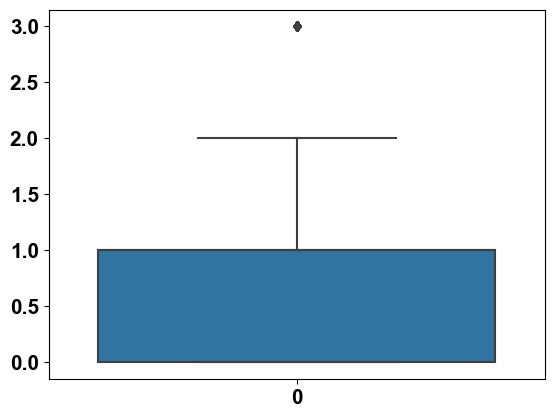

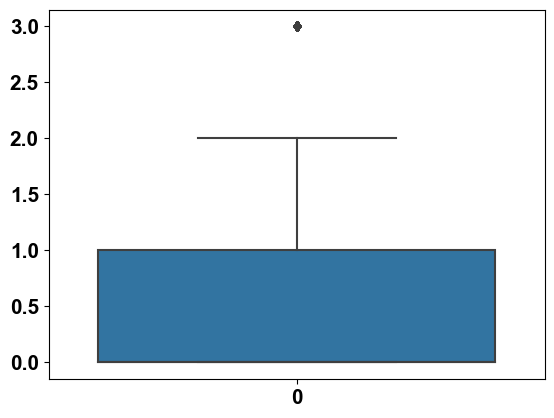

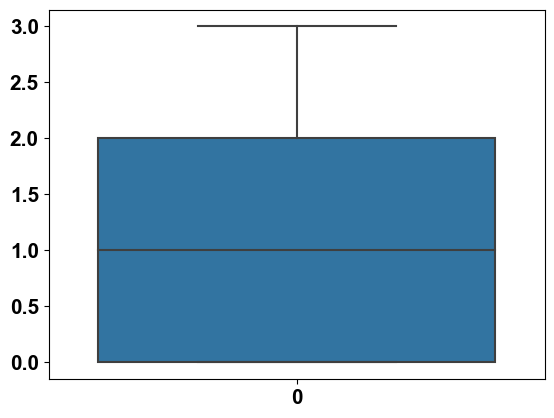

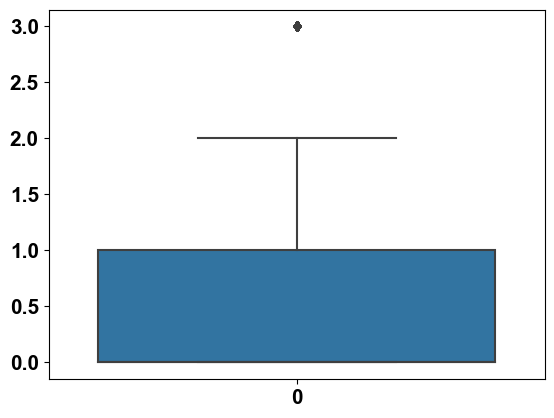

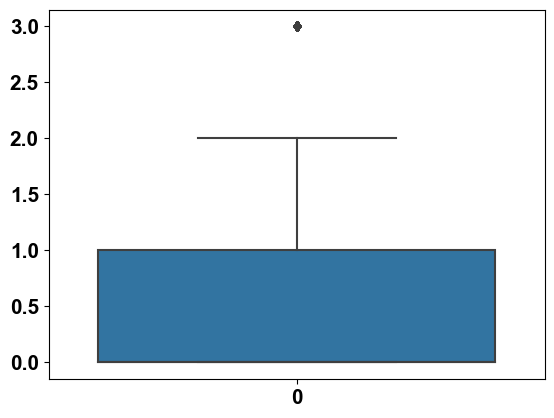

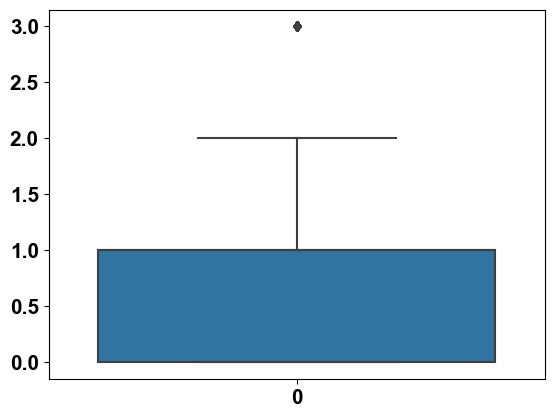

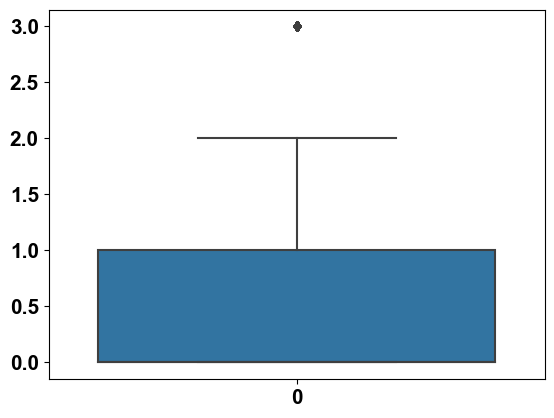

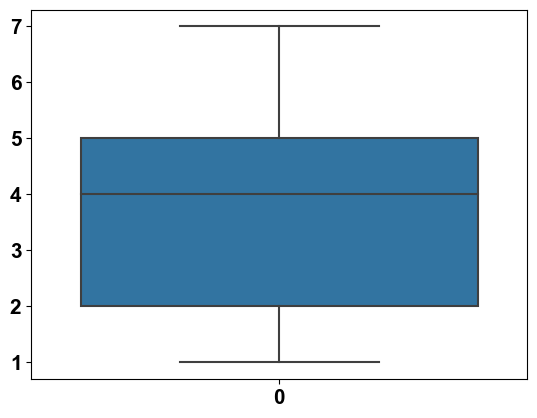

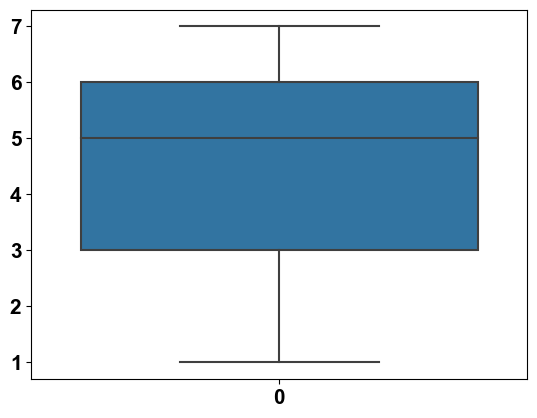

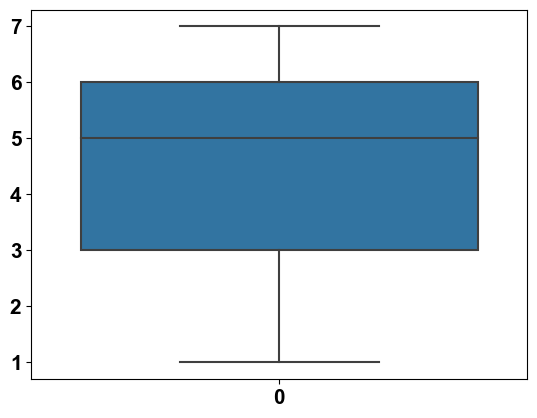

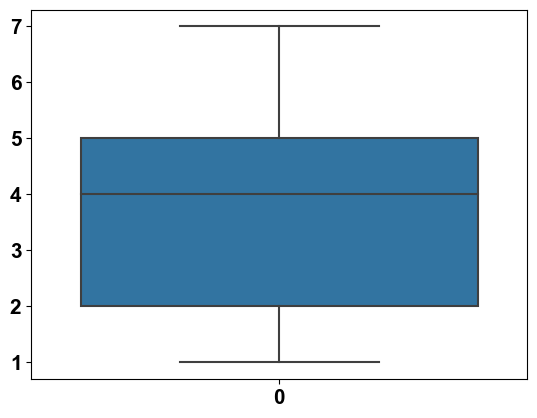

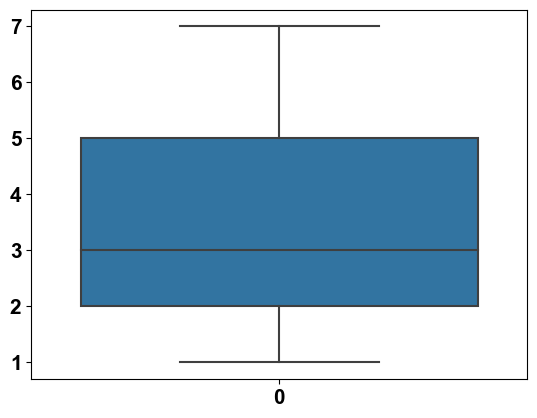

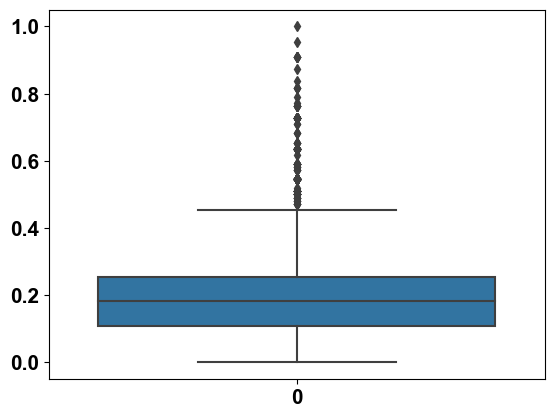

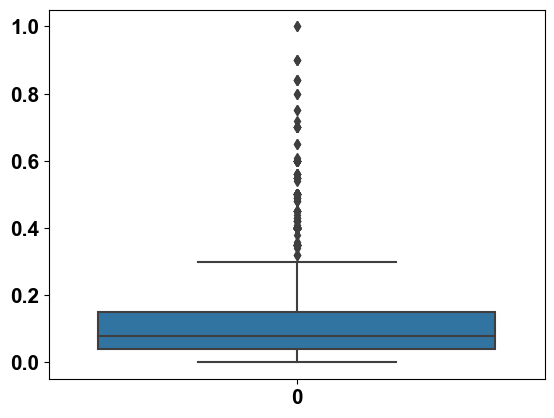

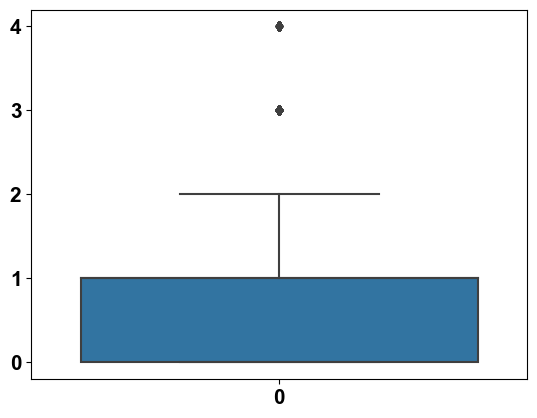

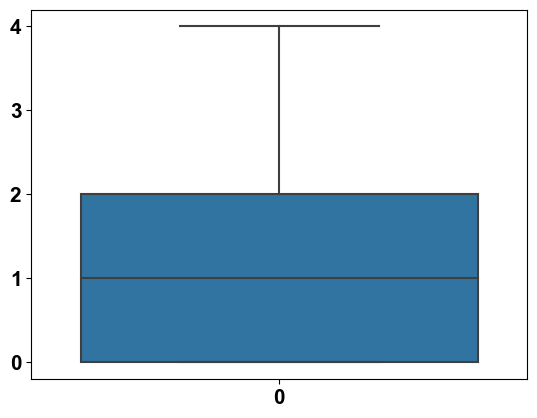

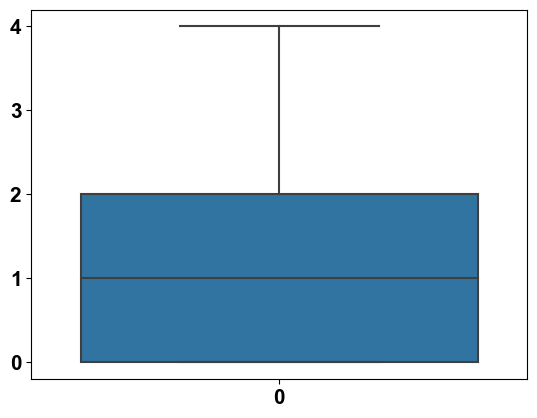

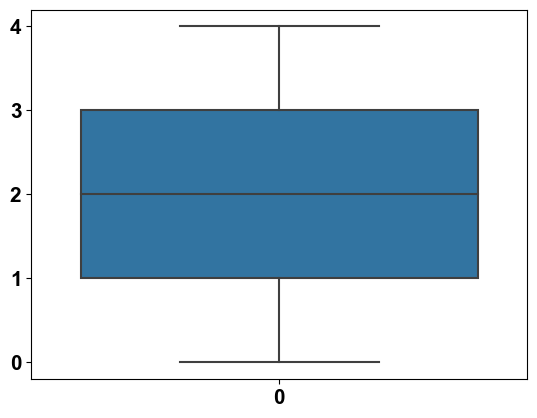

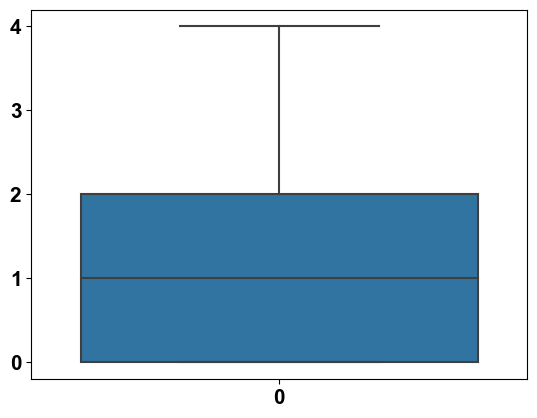

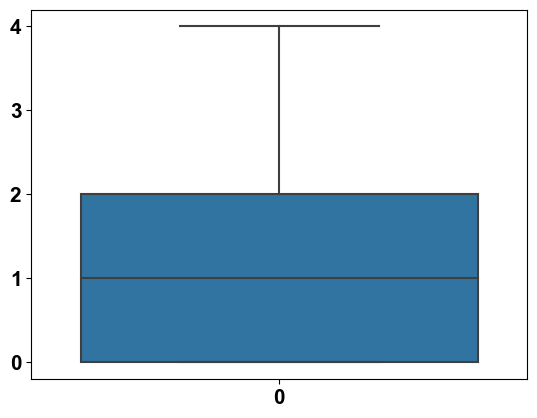

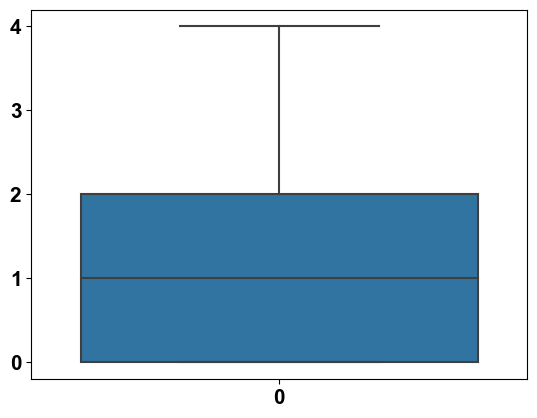

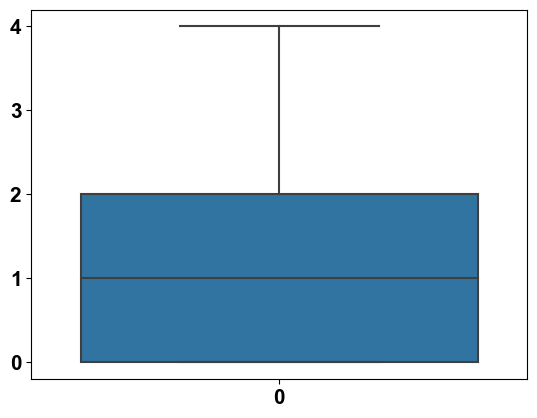

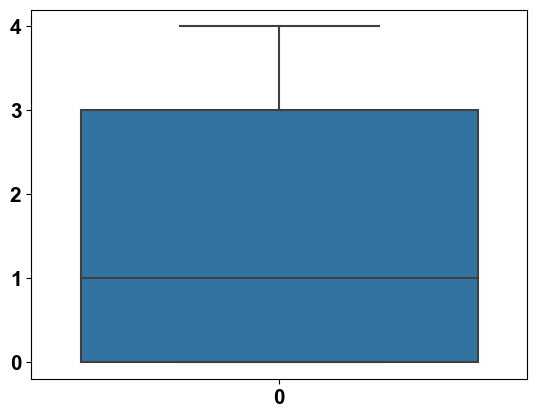

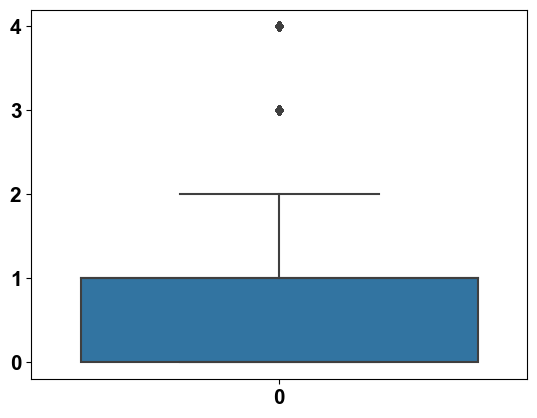

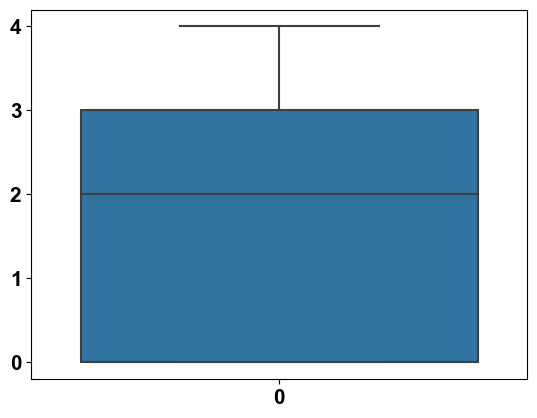

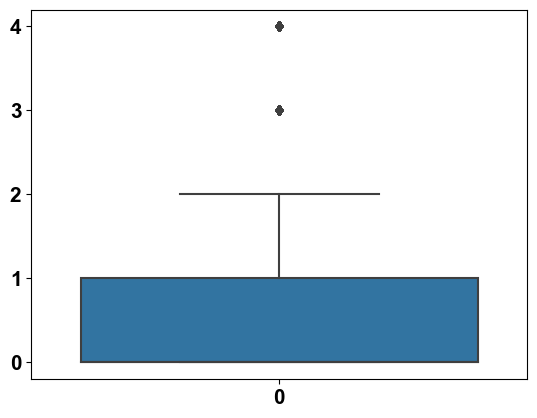

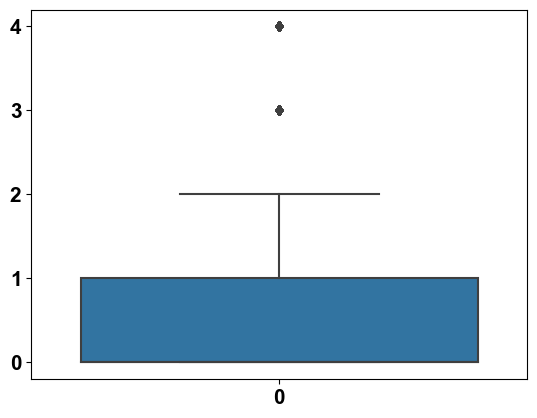

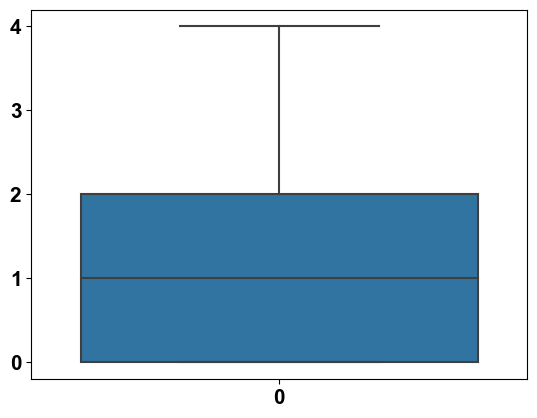

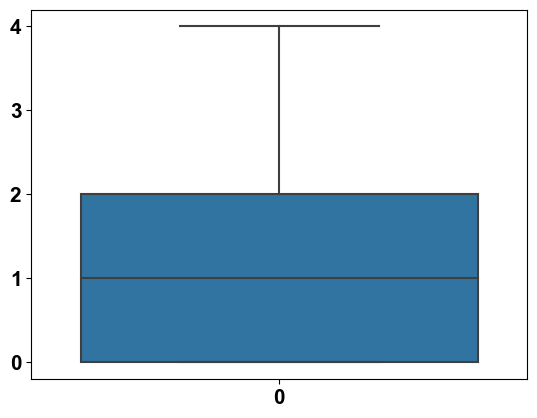

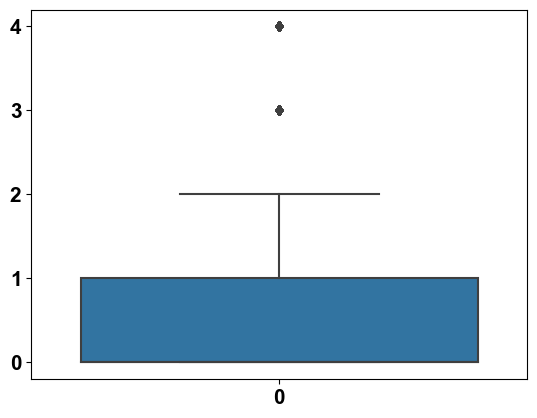

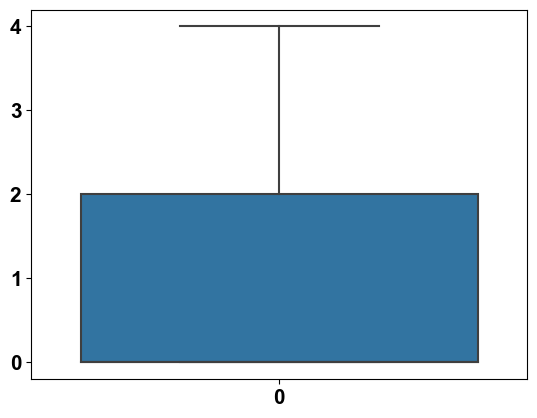

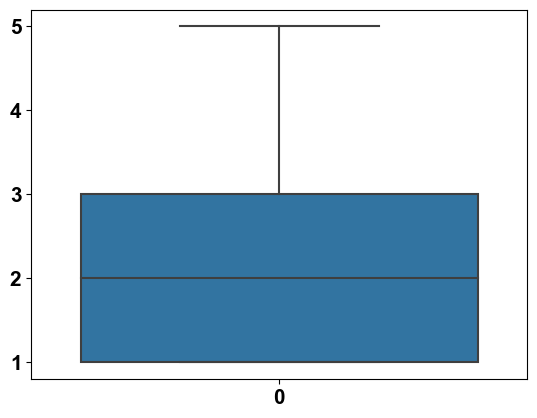

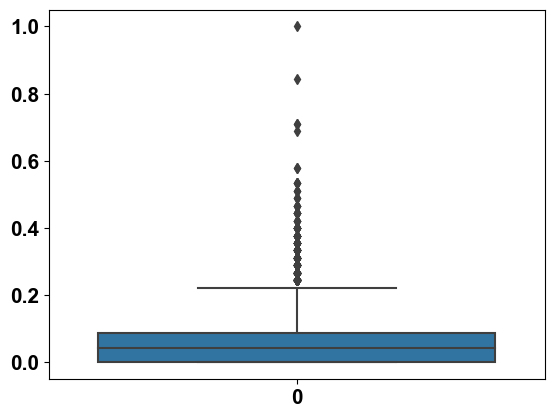

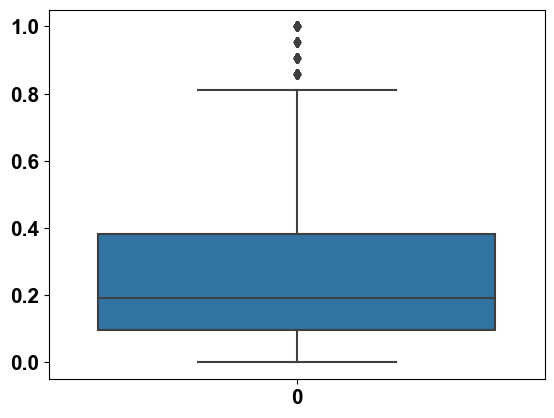

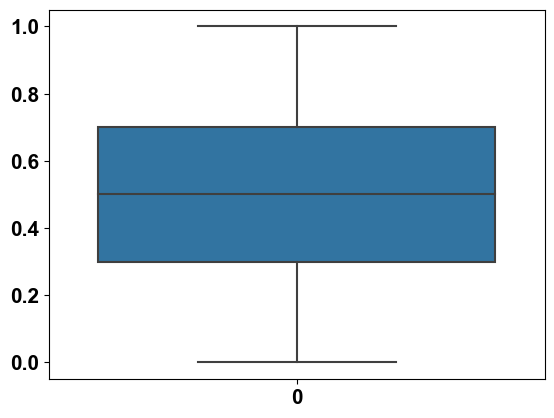

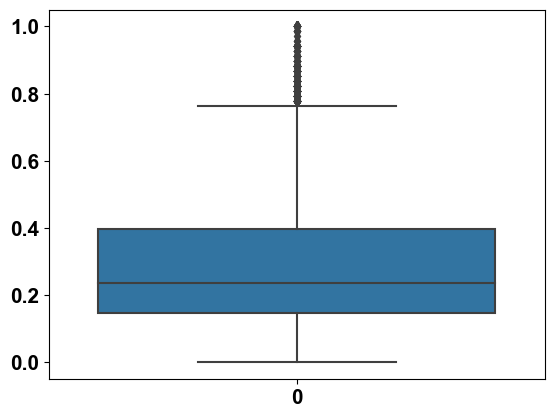

In [304]:
for i in data:
    if data[i].dtype != 'object':
        sns.boxplot(data[i])
        plt.show()

In [305]:
data.drop( data[data['Age'] > 50].index , axis = 0 , inplace=True)

Correlations

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\3904034789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='spearman')


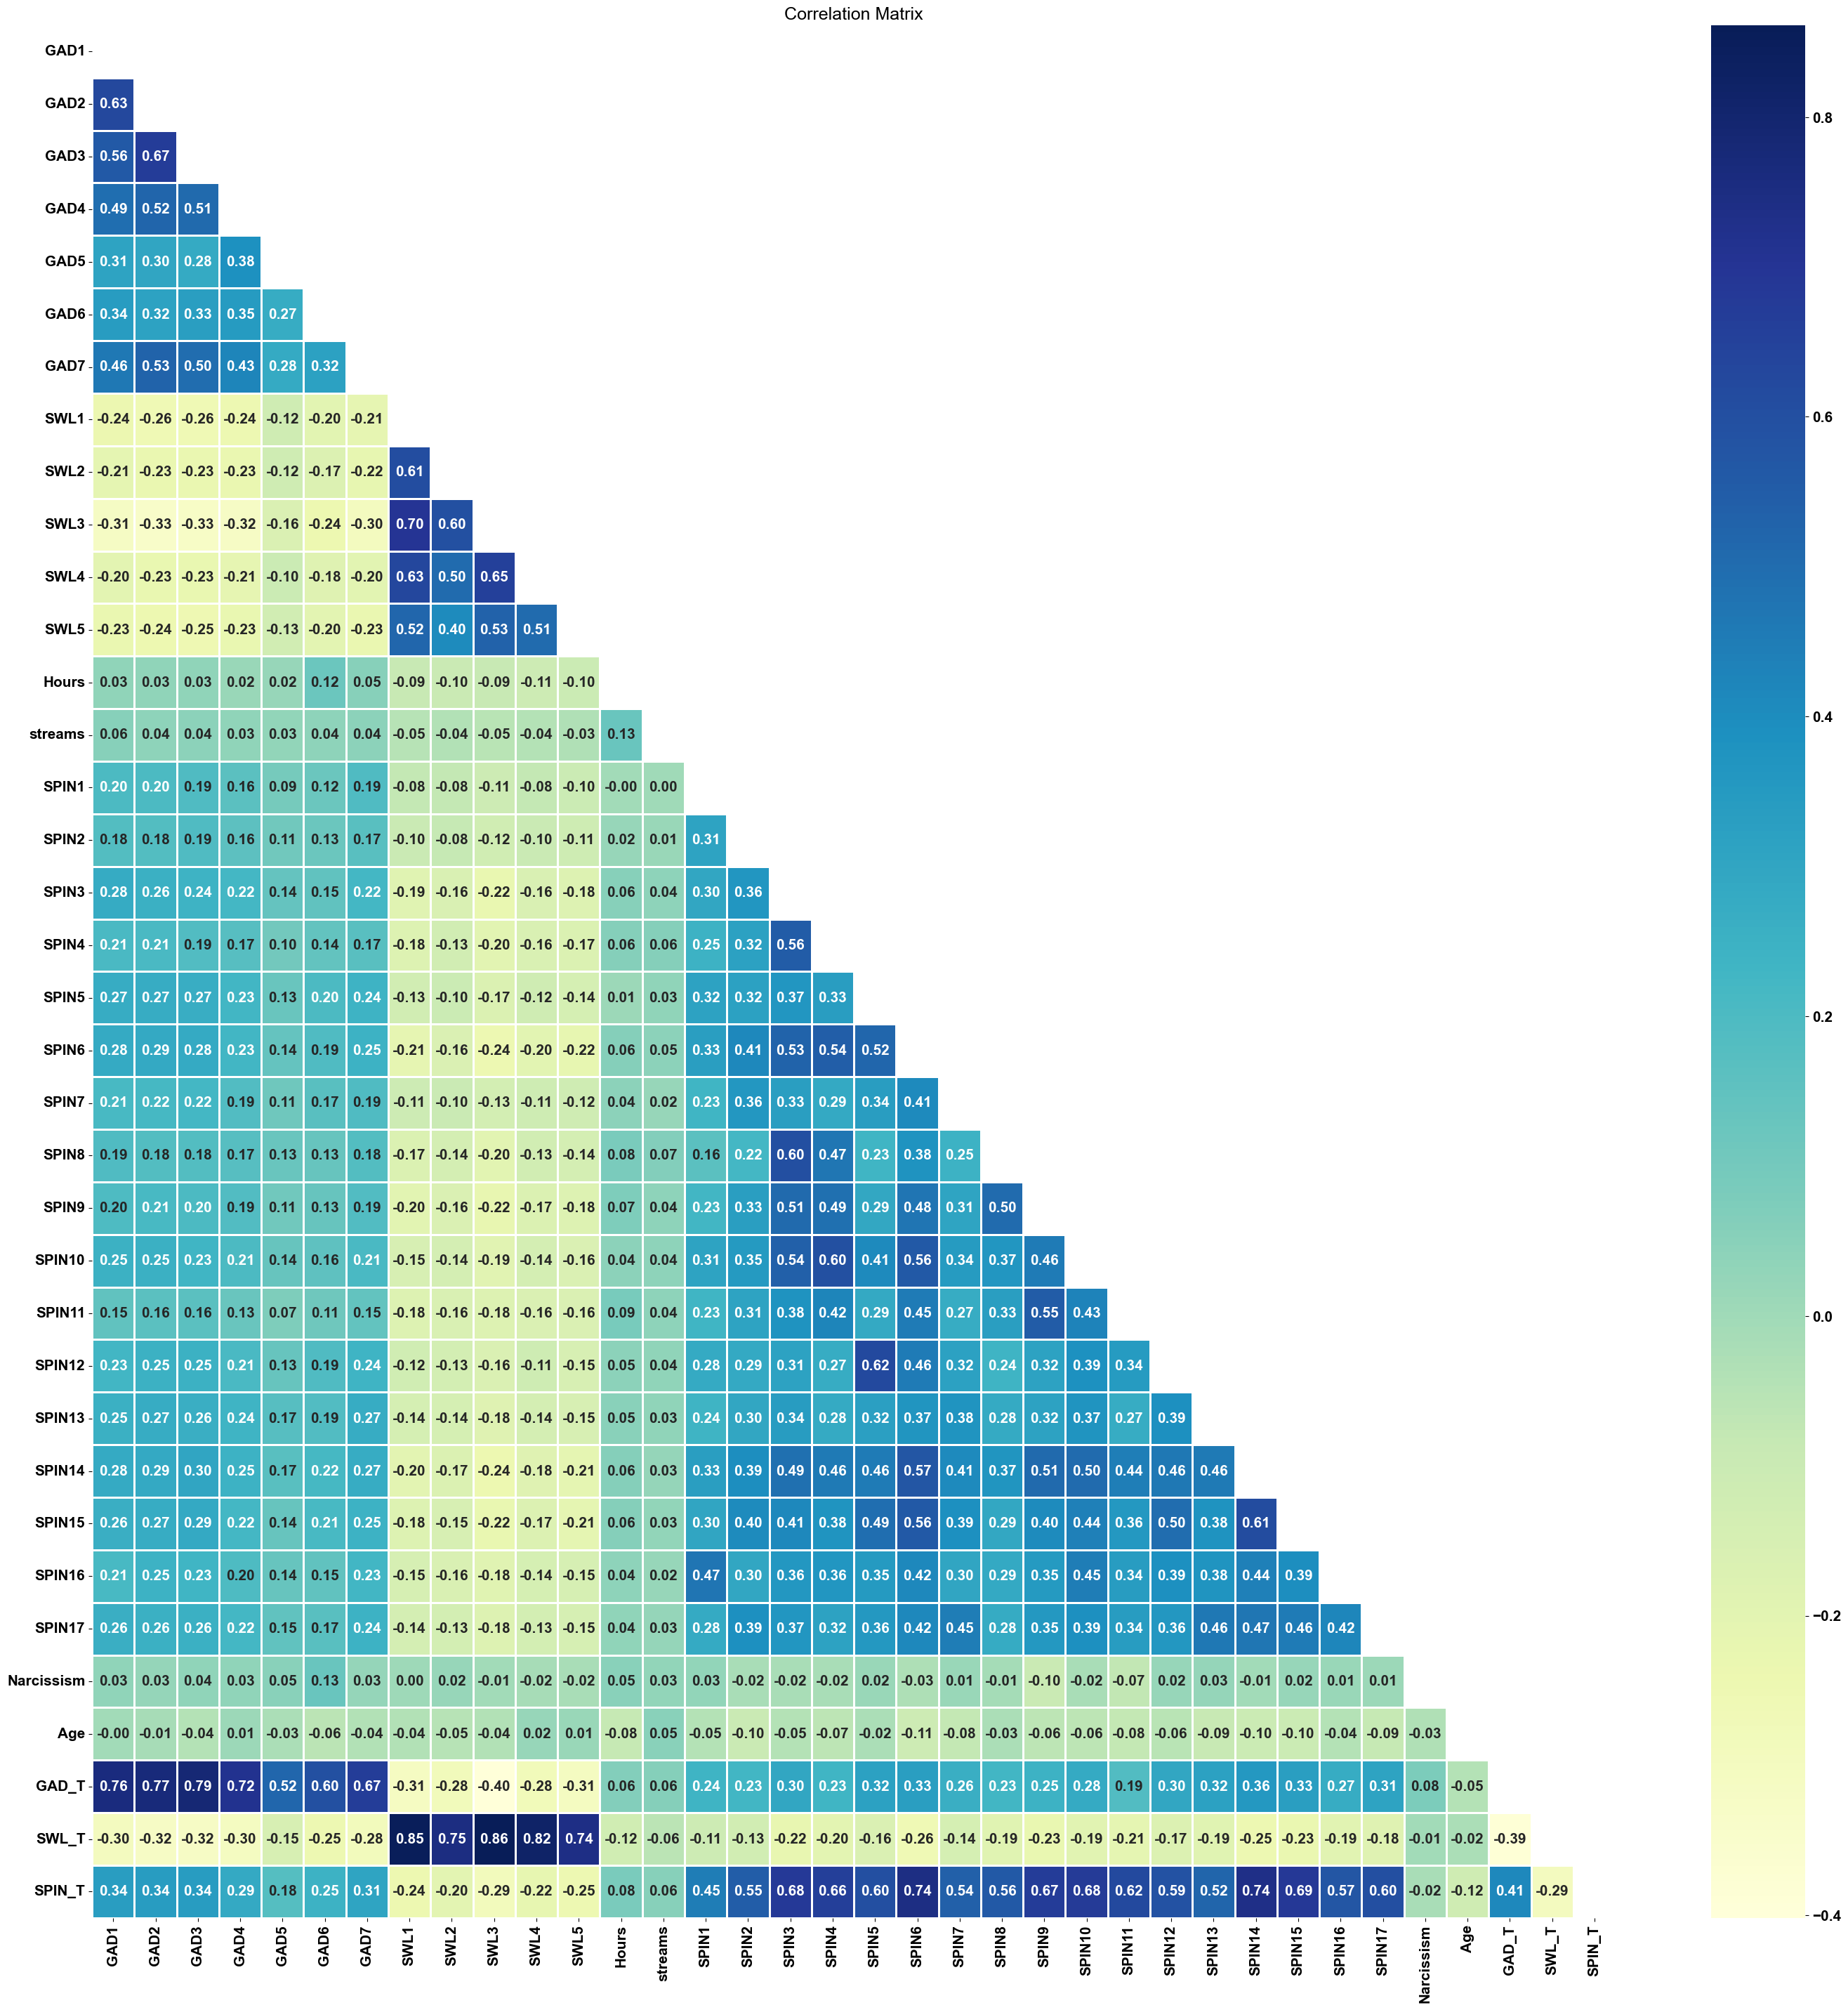

In [306]:
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Scores distribution

Text(0.5, 1.0, 'Narcissism')

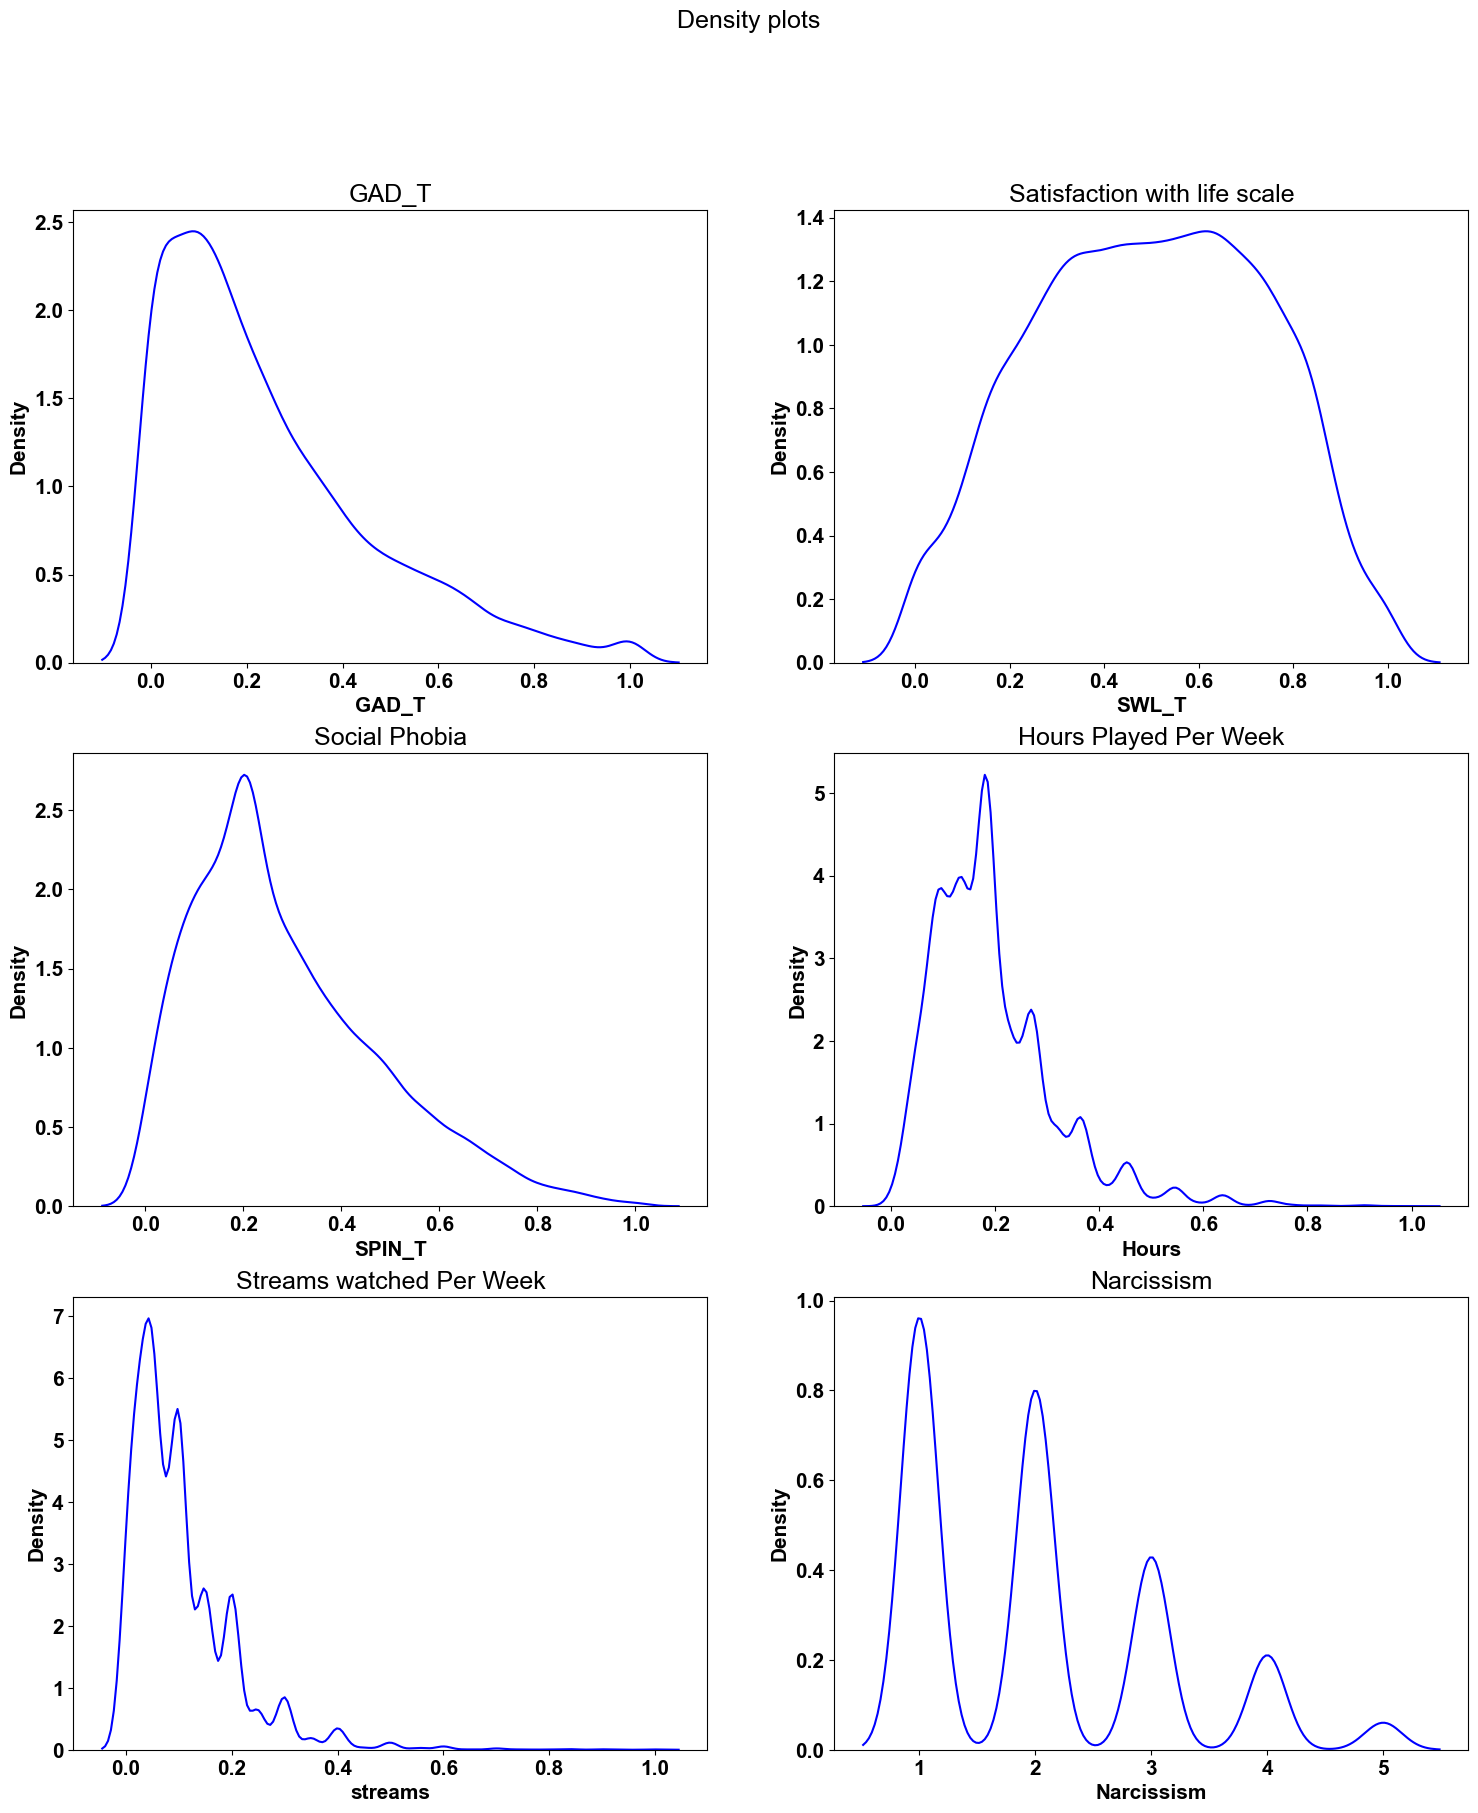

In [307]:

fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Density plots')

sns.kdeplot(data['GAD_T'] , c='b' , ax = axes[0][0])
axes[0][0].set_title('GAD_T')


sns.kdeplot(data['SWL_T'],c='b' , ax = axes[0][1])
axes[0][1].set_title('Satisfaction with life scale')

sns.kdeplot(data['SPIN_T'],c='b' , ax = axes[1][0])
axes[1][0].set_title('Social Phobia')


sns.kdeplot(data['Hours'],c='b' , ax = axes[1][1])
axes[1][1].set_title('Hours Played Per Week')

sns.kdeplot(data.streams,c='b' , ax = axes[2][0])
axes[2][0].set_title('Streams watched Per Week')

sns.kdeplot(data['Narcissism'],c='b' , ax = axes[2][1])
axes[2][1].set_title('Narcissism')

Line plot Anxities vs hours played , watched

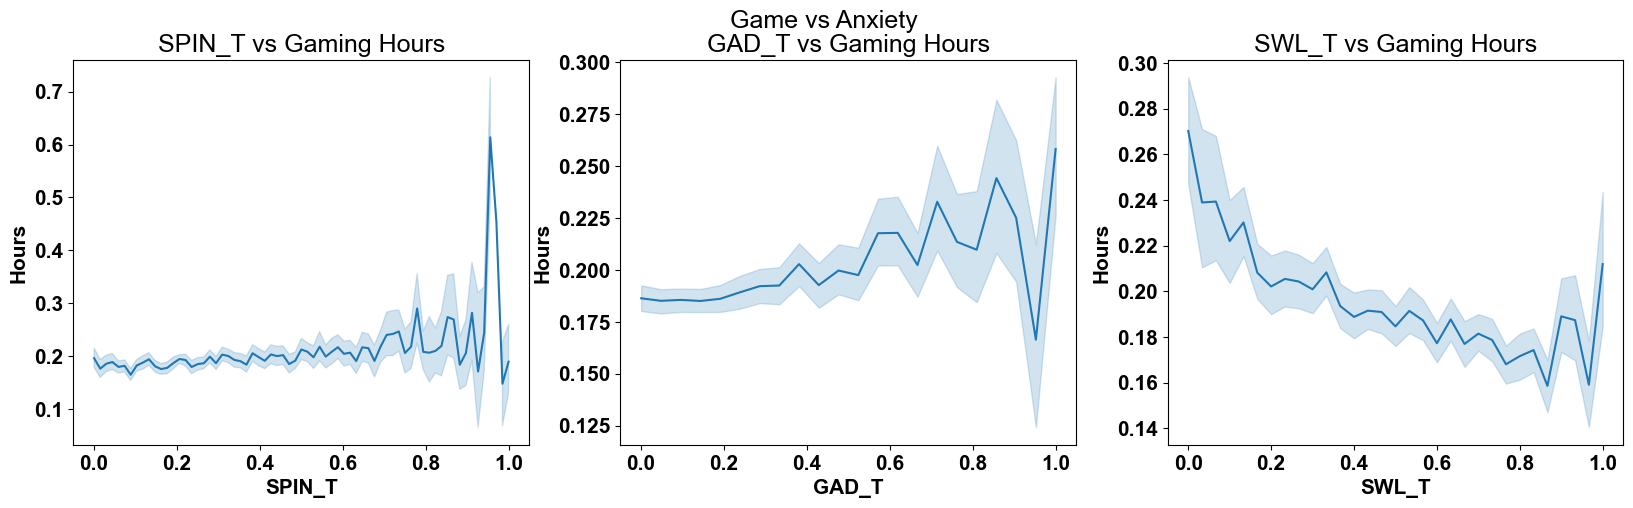

In [308]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours", data=data , ax = axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")

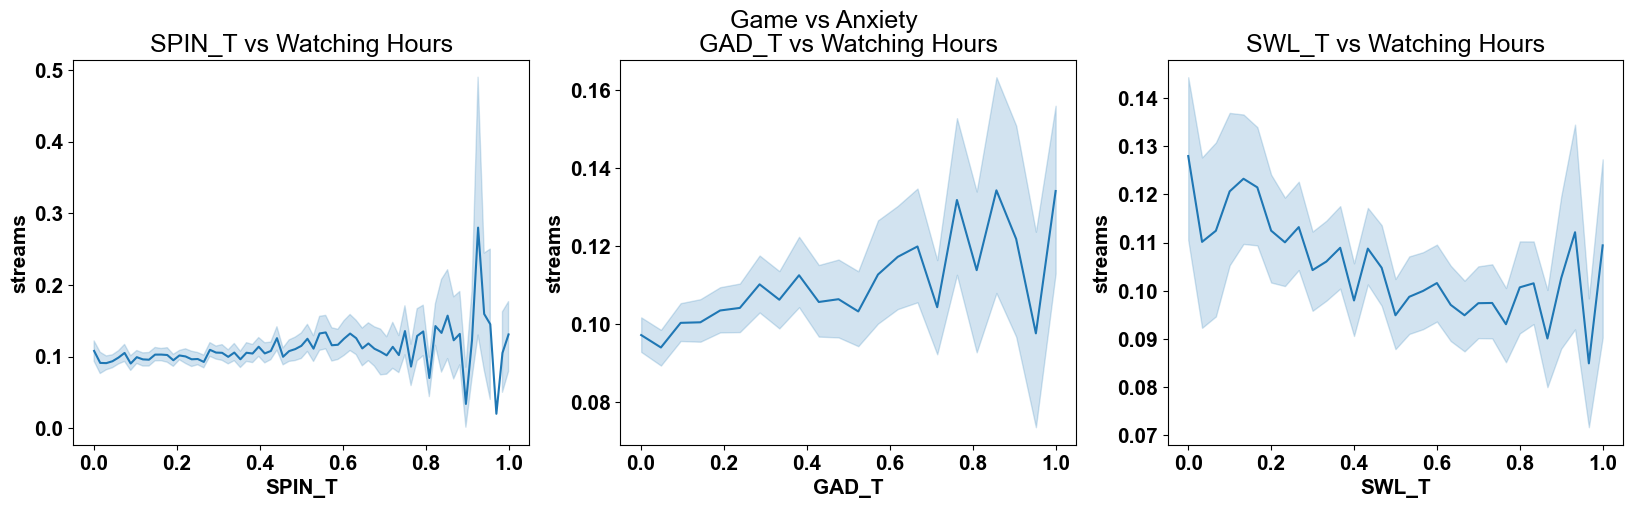

In [309]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="streams", data=data , ax = axes[count])
    axes[count].set_title(f"{ele} vs Watching Hours")

some pie charts

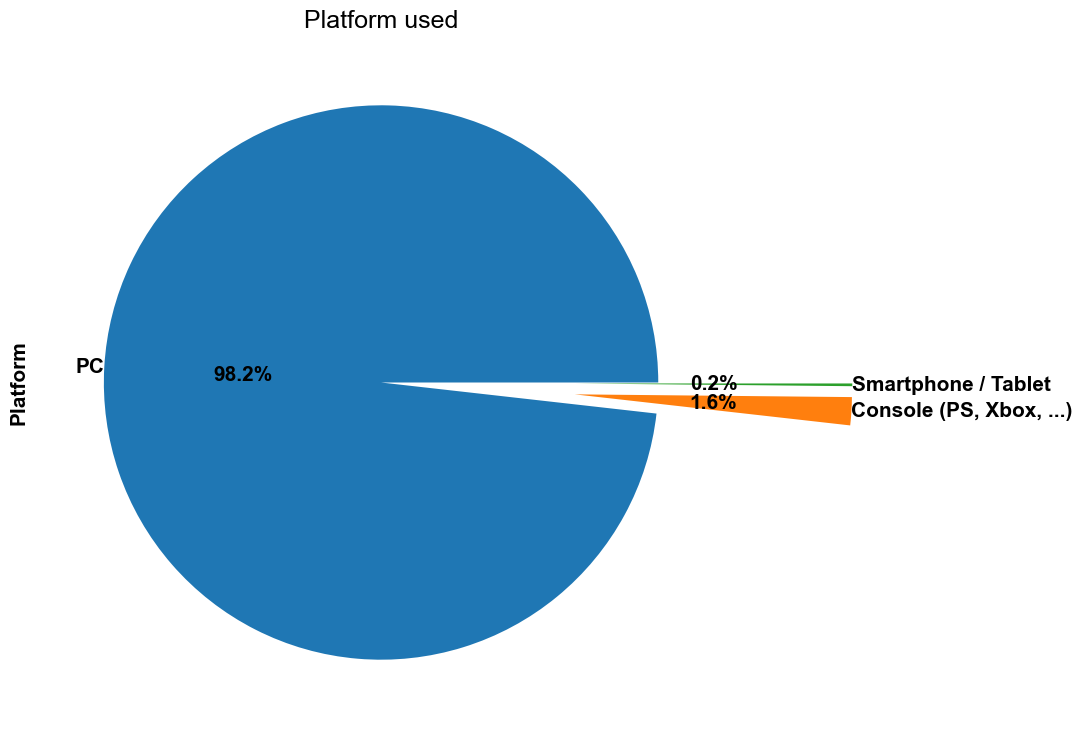

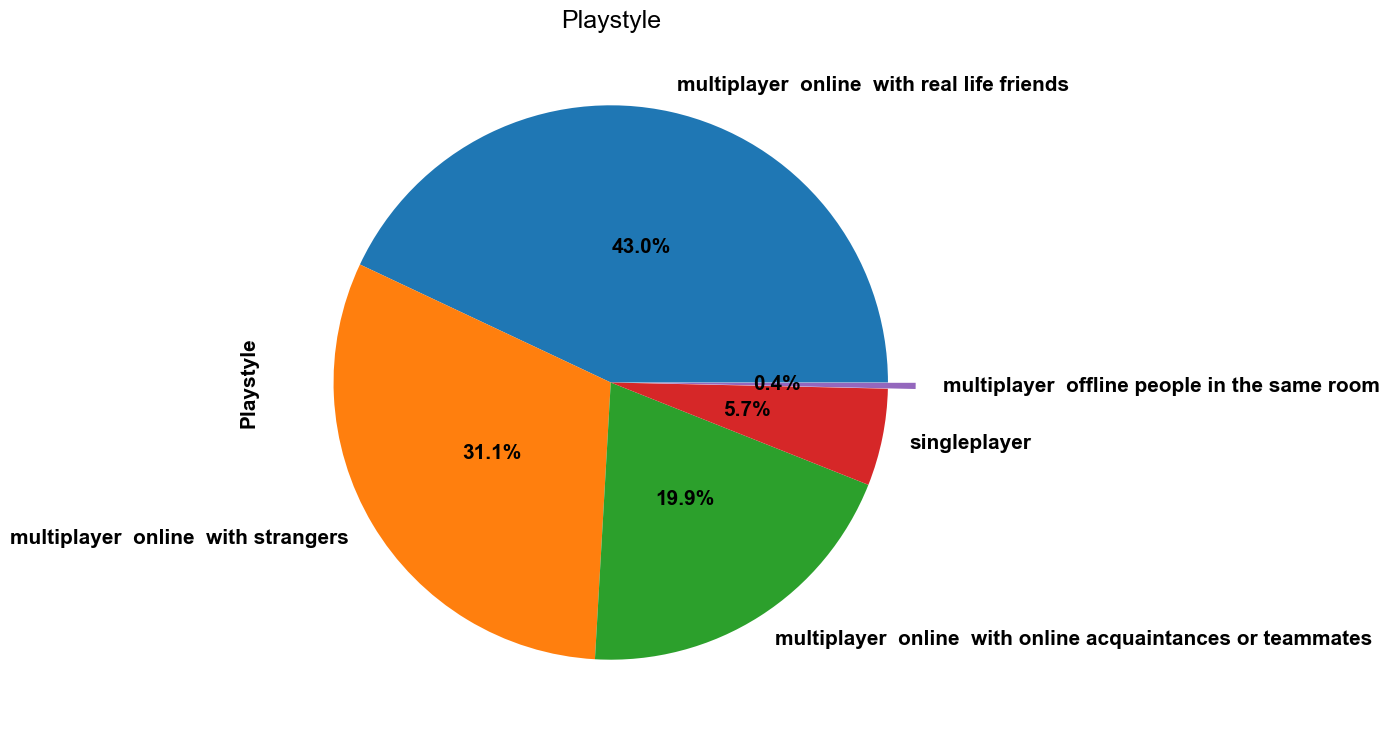

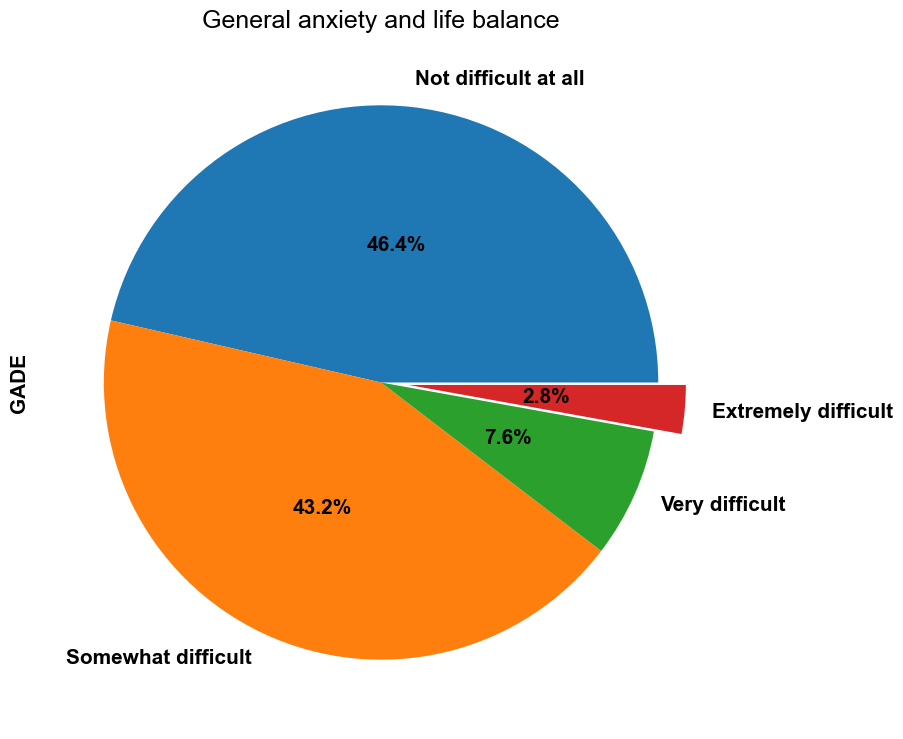

In [310]:
plt.figure(figsize=(9,9))
myexplode = [0, 0.7, 0.7]
data.Platform.value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5, labeldistance=1 , explode=myexplode )
plt.title("Platform used")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0,0.1]
data.Playstyle.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("Playstyle")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0.1]
data.GADE.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("General anxiety and life balance")
plt.show()

Game played vs total scores

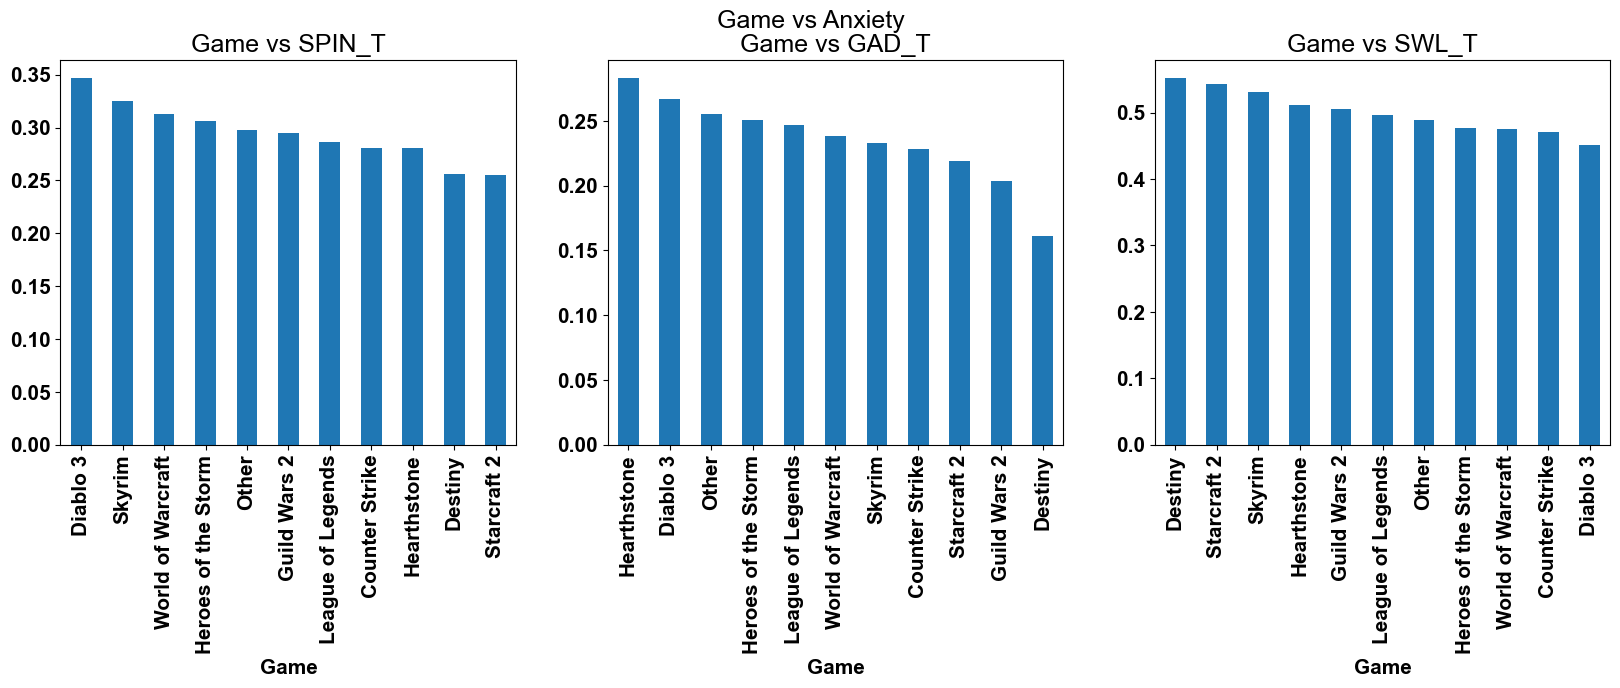

In [311]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    data.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Game vs {ele}")

Residence vs scores

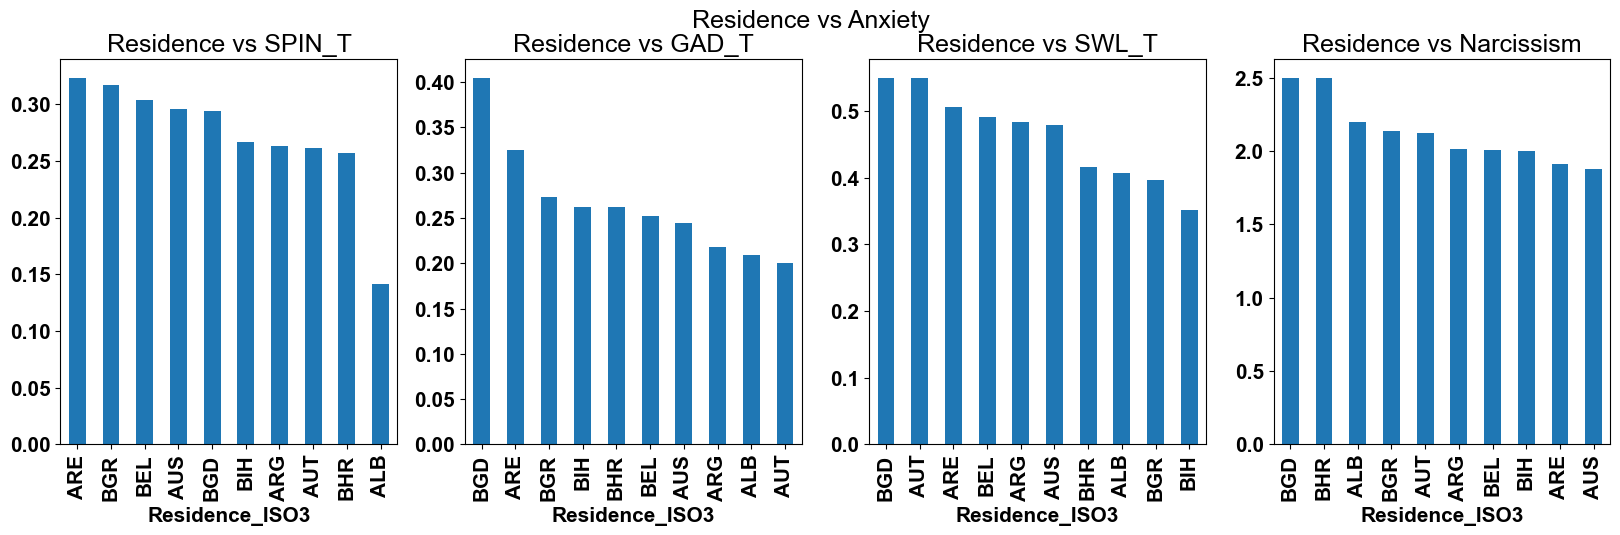

In [312]:
fig, axes = plt.subplots(1 , 4, figsize=(20, 5) )
fig.suptitle('Residence vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T' , 'Narcissism']

for count, ele in enumerate(labels):
    data.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Residence vs {ele}")

Time related EDA

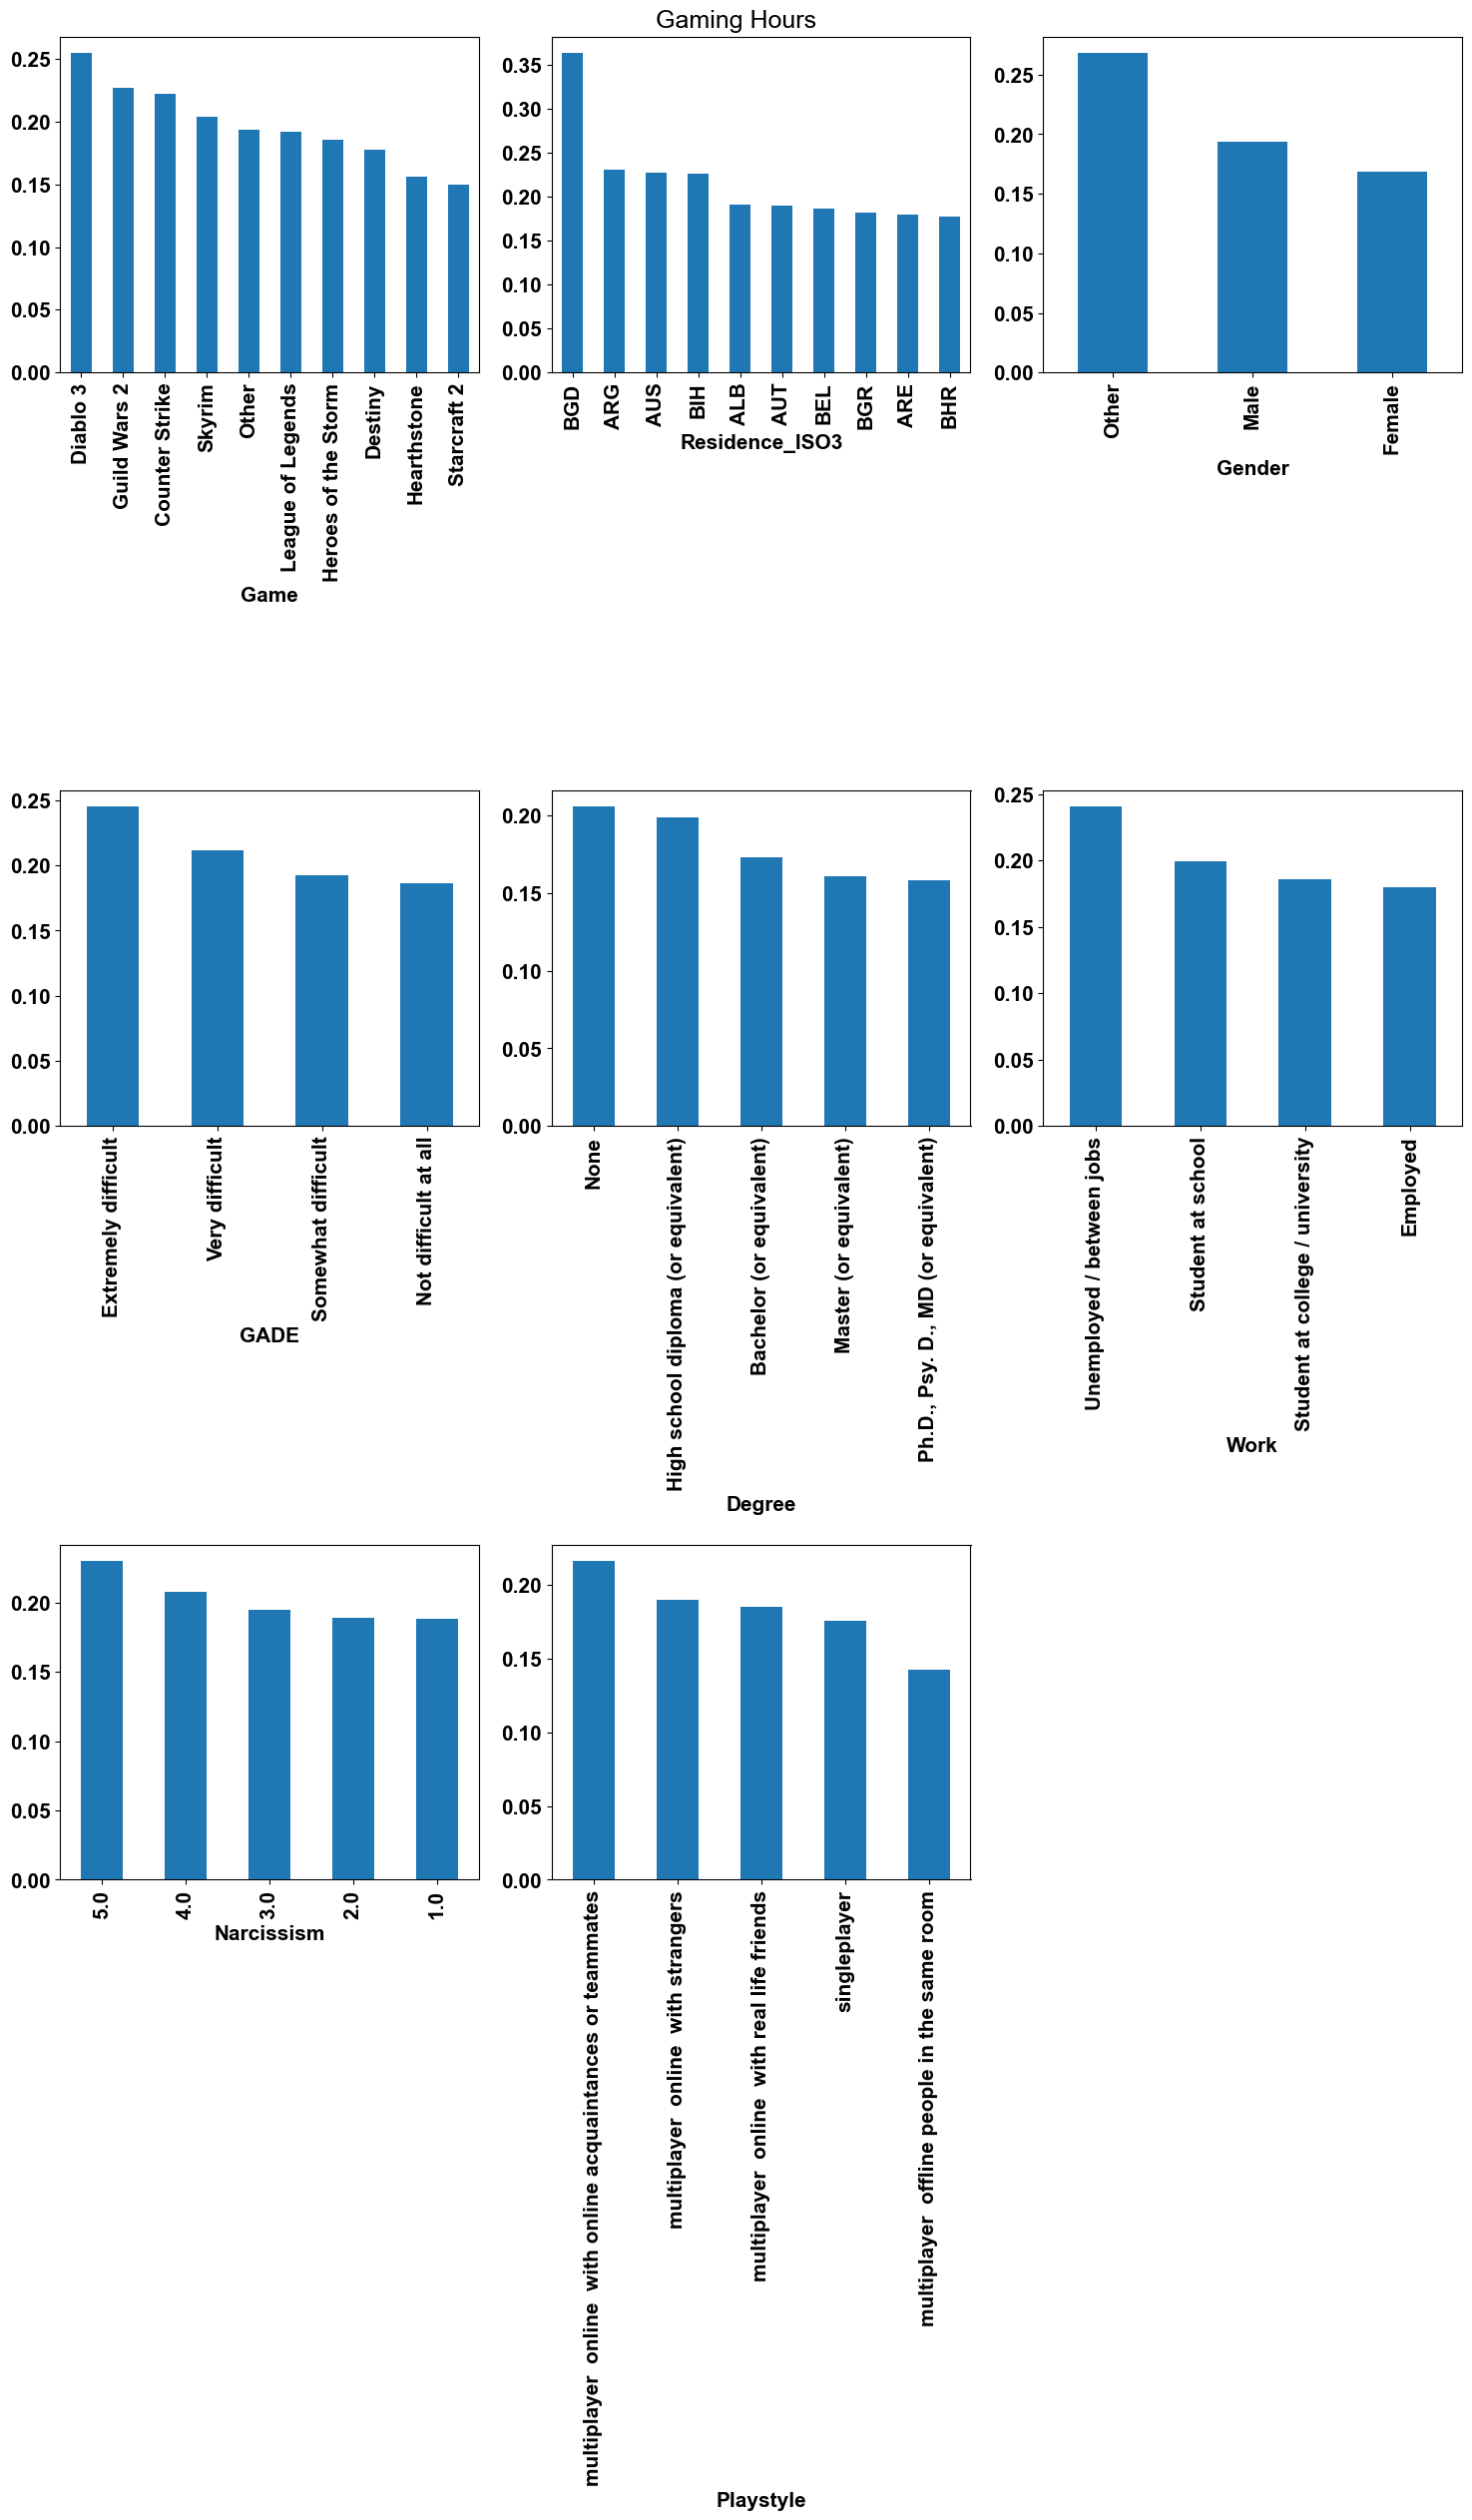

In [313]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(15,20))
plt.suptitle('Gaming Hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    data.groupby(ele)['Hours'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

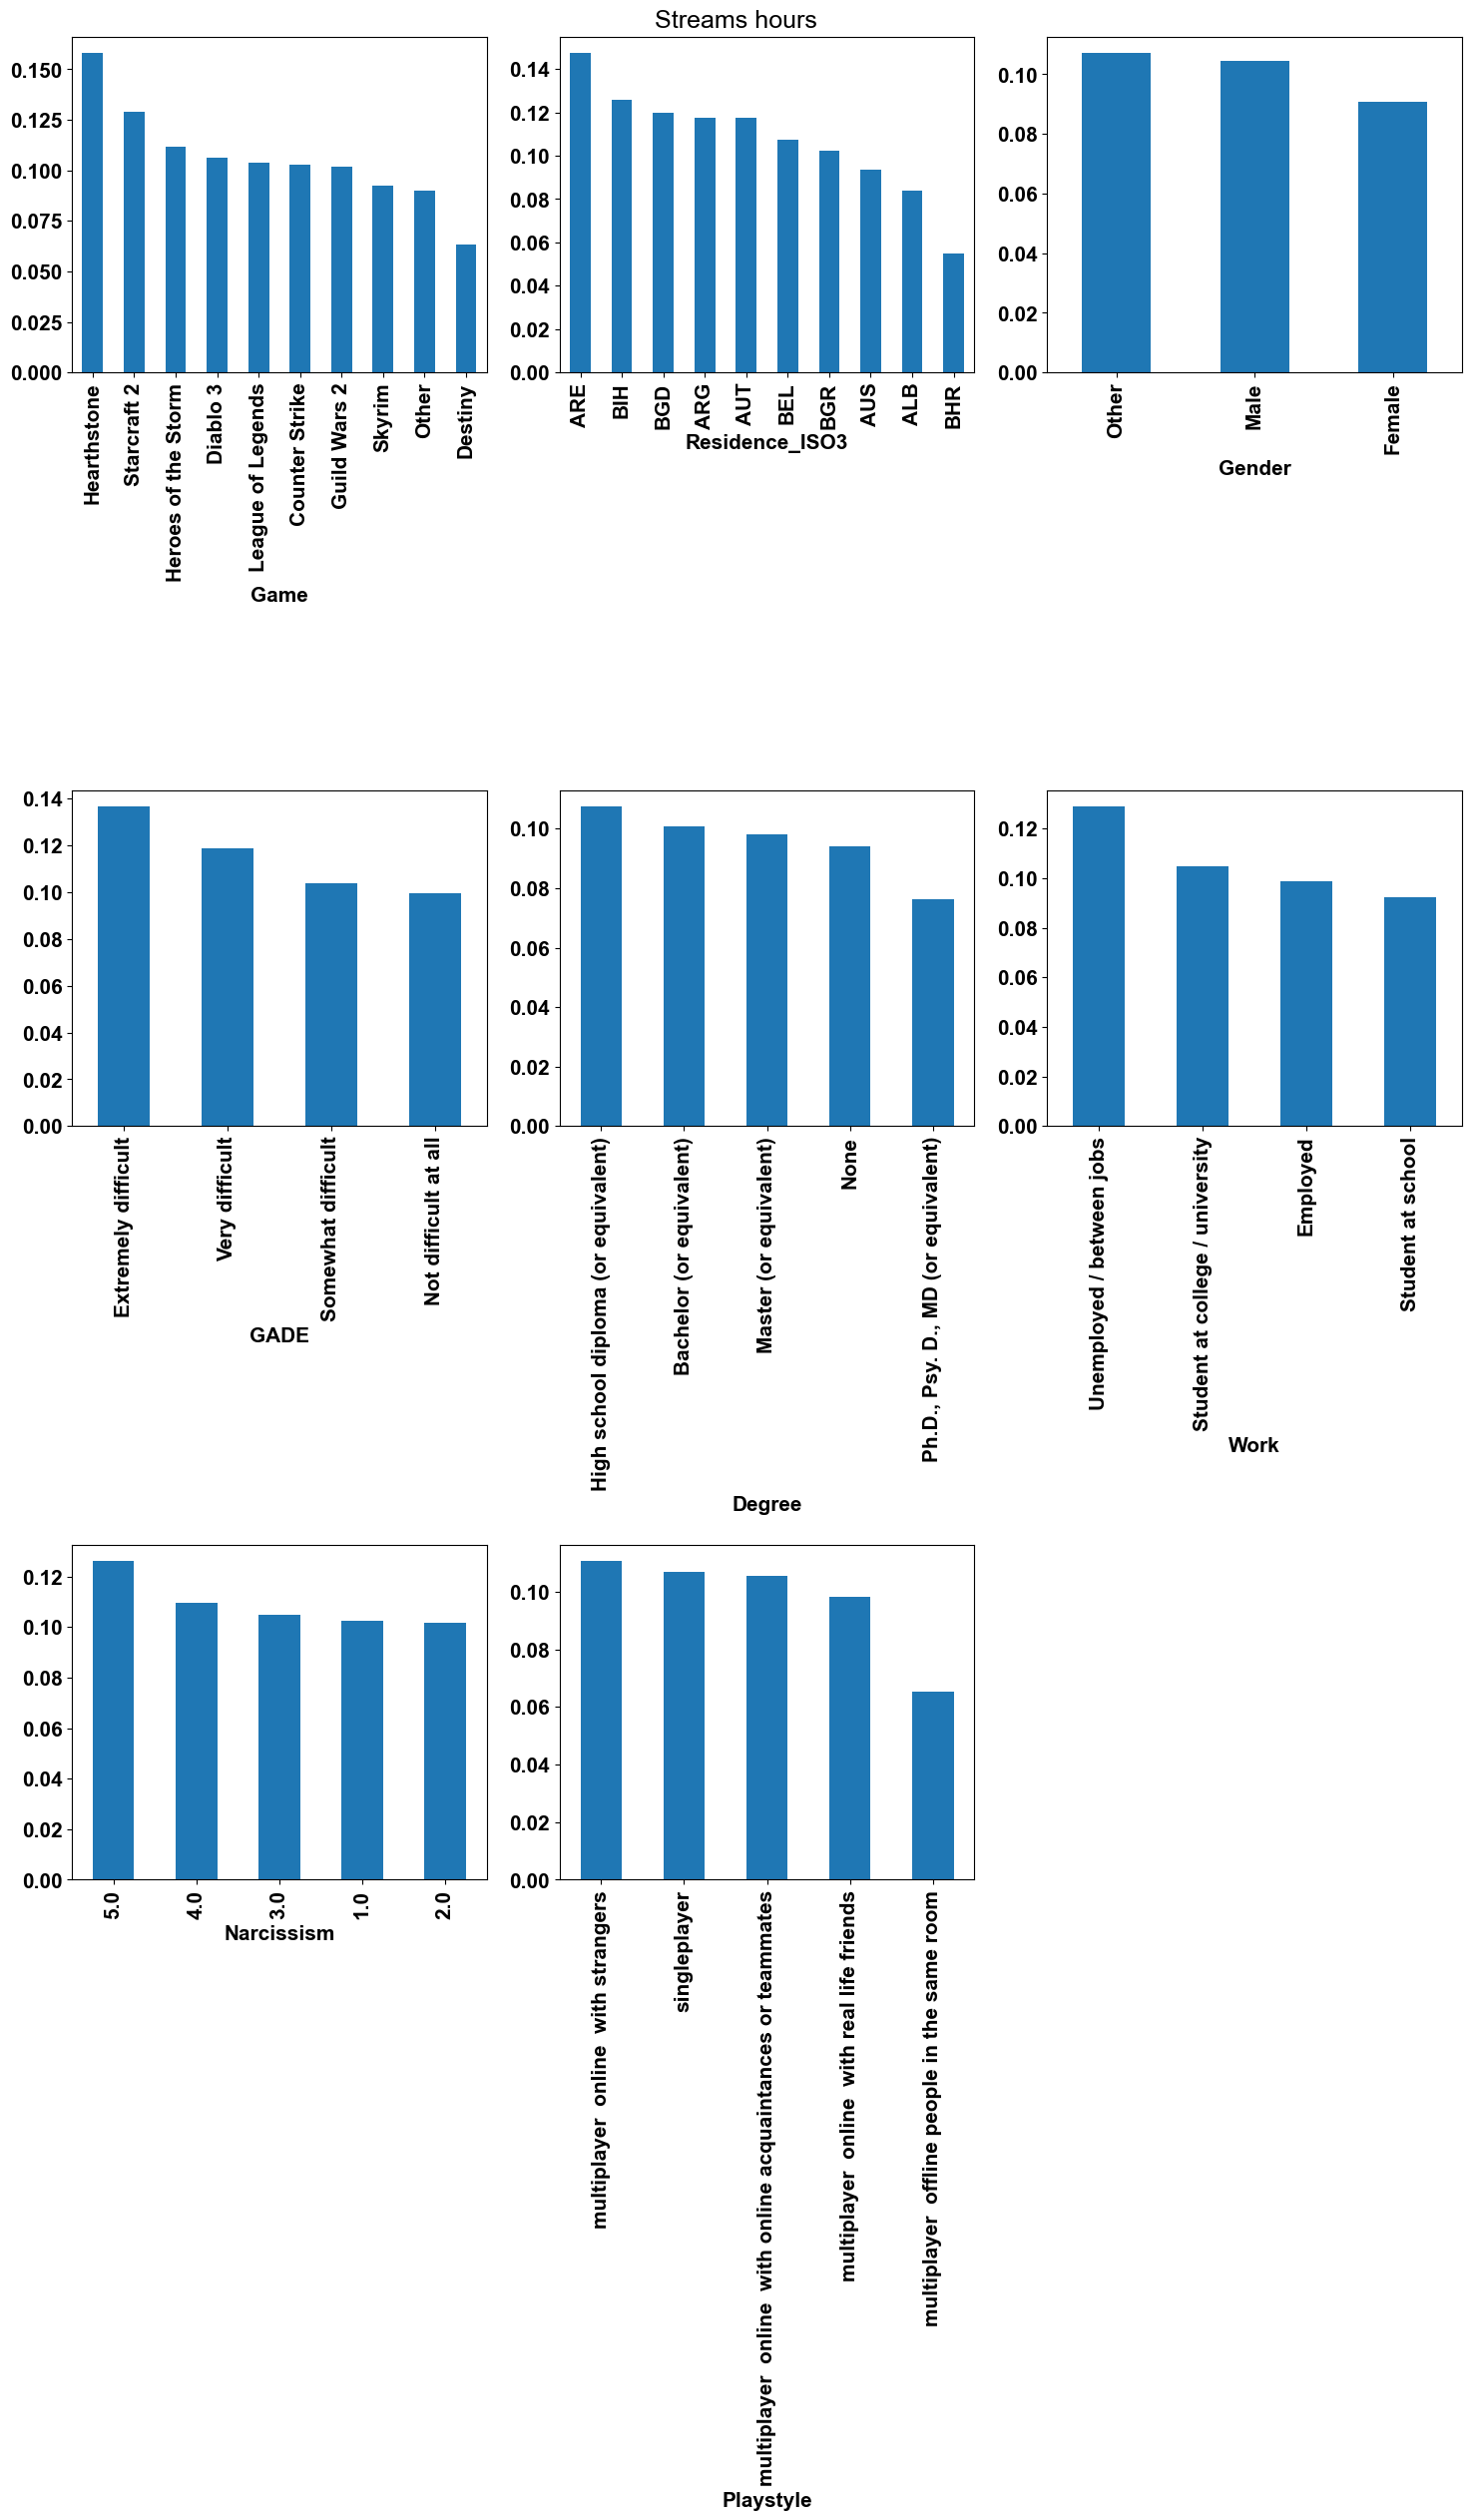

In [314]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(15,20))
plt.suptitle('Streams hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    data.groupby(ele)['streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

# Other EDA


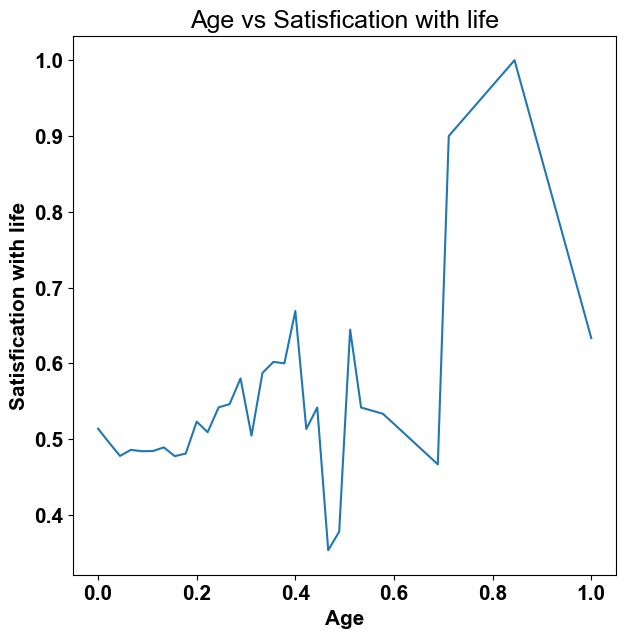

In [315]:
plt.figure(figsize=(7,7))
data.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

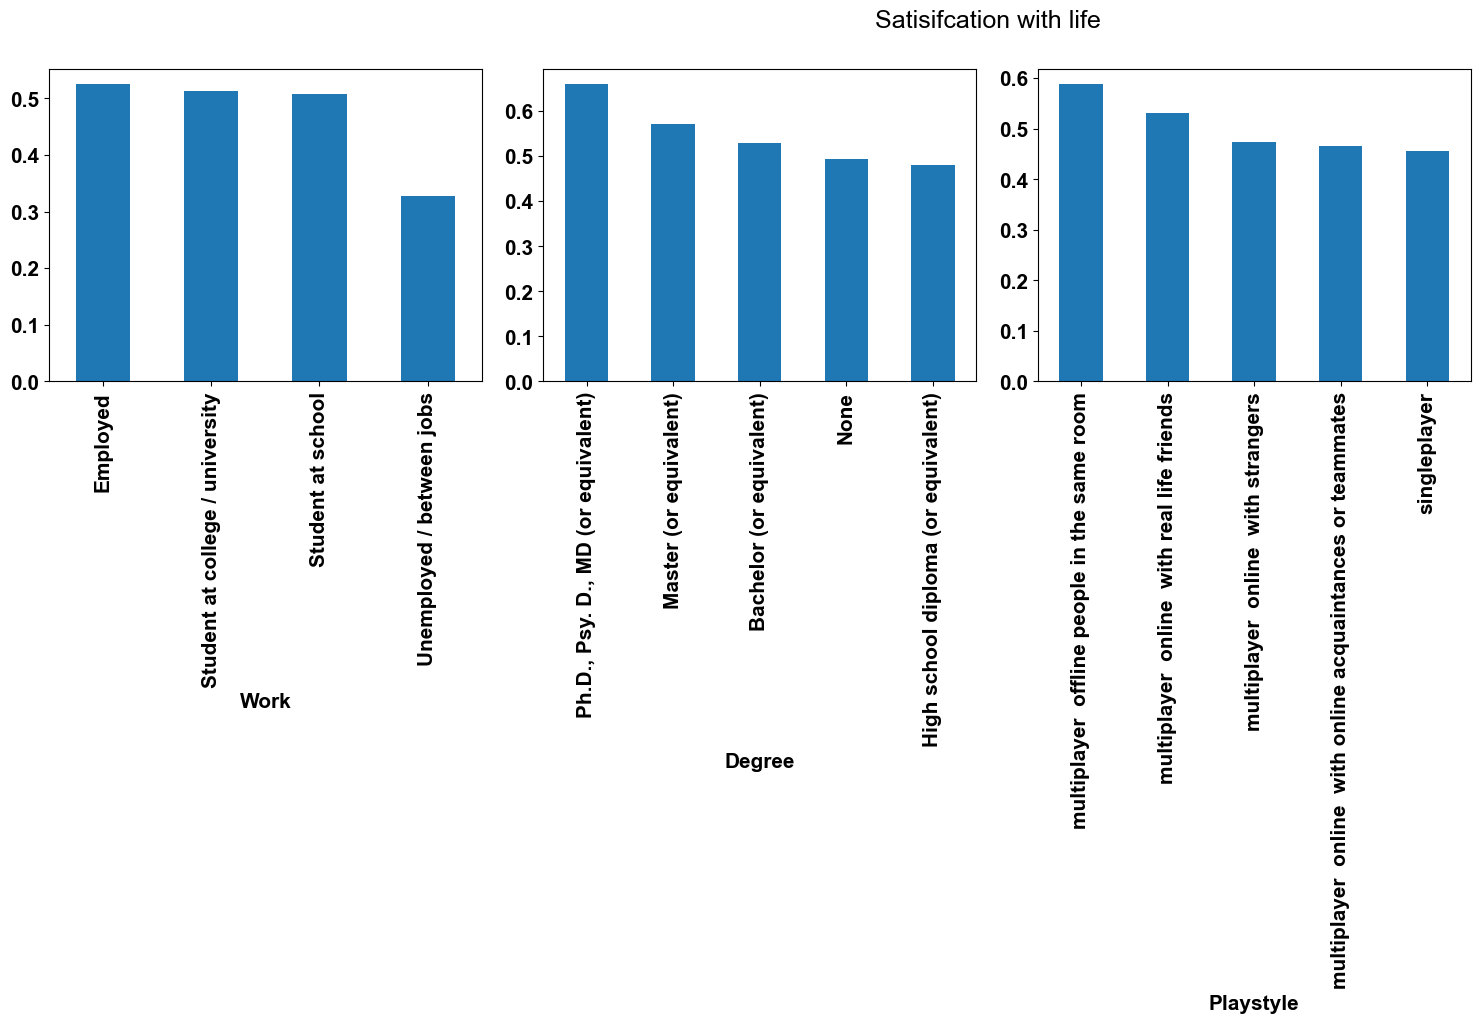

In [316]:
labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(20,8))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    data.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

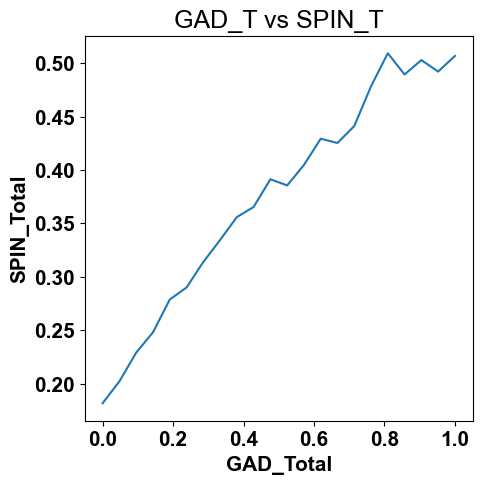

In [317]:
plt.figure(figsize=(5,5))
data.groupby('GAD_T')['SPIN_T'].mean().plot()
plt.title("GAD_T vs SPIN_T")
plt.xlabel("GAD_Total")
plt.ylabel("SPIN_Total")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\798846431.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')


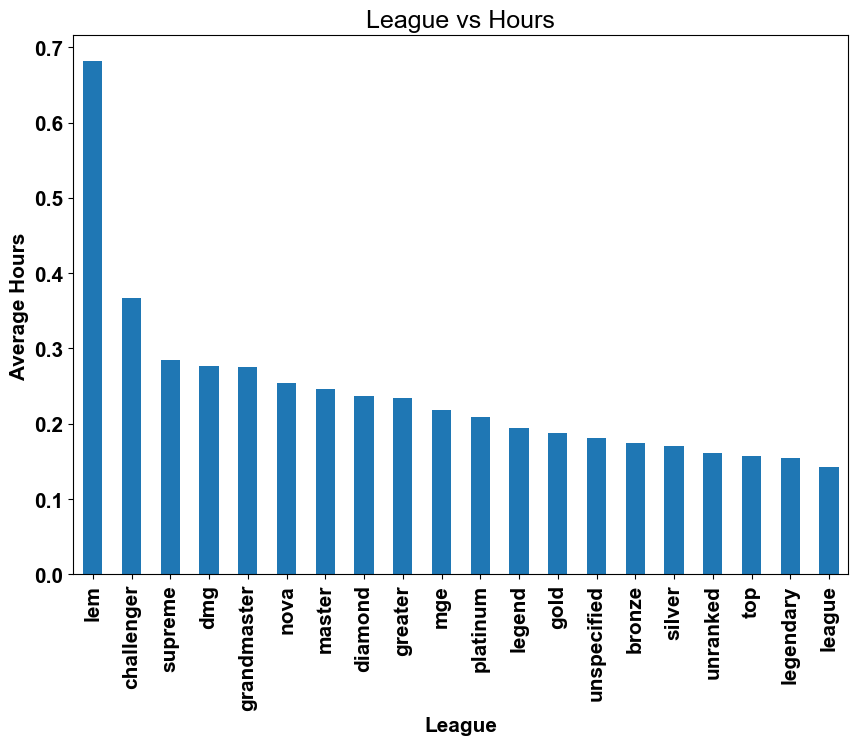

In [318]:
plt.figure(figsize=(10,7))
data.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')
plt.title("League vs Hours")
plt.xlabel("League")
plt.ylabel("Average Hours")
plt.show()

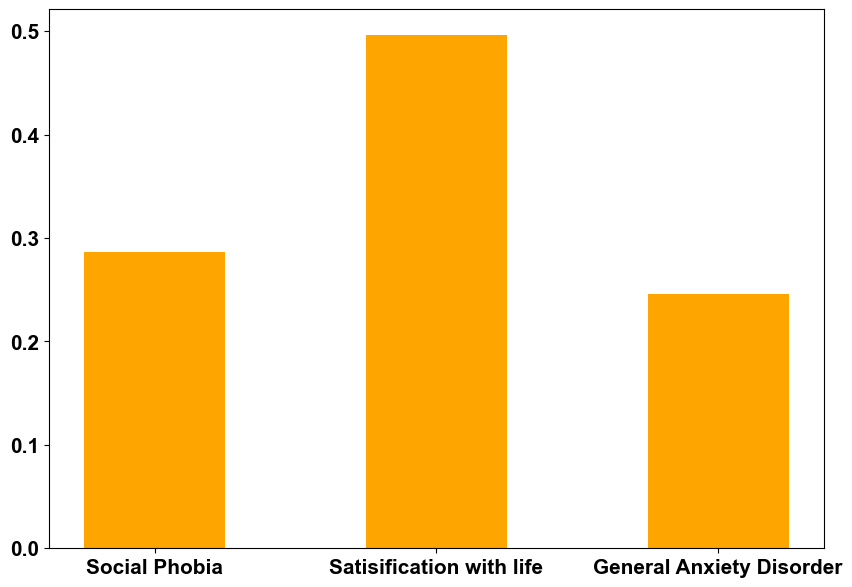

In [319]:
x=data.SPIN_T.mean()
y = data.SWL_T.mean()
z = data.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='orange',
        width = 0.5)
plt.show()

Label Encoding

In [320]:
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder
le = LabelEncoder()


In [321]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [322]:
data.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  ...  Gender  \
0     0     0     0     0     1     0     0     1     3     5  ...       1   
1     1     2     2     2     0     1     0     2     3     5  ...       1   
3     0     0     0     0     0     0     0     1     2     5  ...       1   
4     2     1     2     2     2     3     2     3     2     2  ...       1   
5     0     0     0     0     0     1     0     1     3     5  ...       1   

        Age  Work  Degree  Reference  Playstyle     GAD_T     SWL_T    SPIN_T  \
0  0.155556     3       0          2          4  0.047619  0.600000  0.073529   
1  0.511111     3       0          2          3  0.380952  0.366667  0.485294   
3  0.222222     0       0          2          1  0.000000  0.400000  0.161765   
4  0.022222     0       1          2          3  0.666667  0.300000  0.191176   
5  0.133333     0       0          2          2  0.047619  0.400000  0.191176   

   Residence_ISO3  
0             102  
1             102  
3             102  
4              56  
5             102  

[5 rows x 48 columns]

Feature Engineering

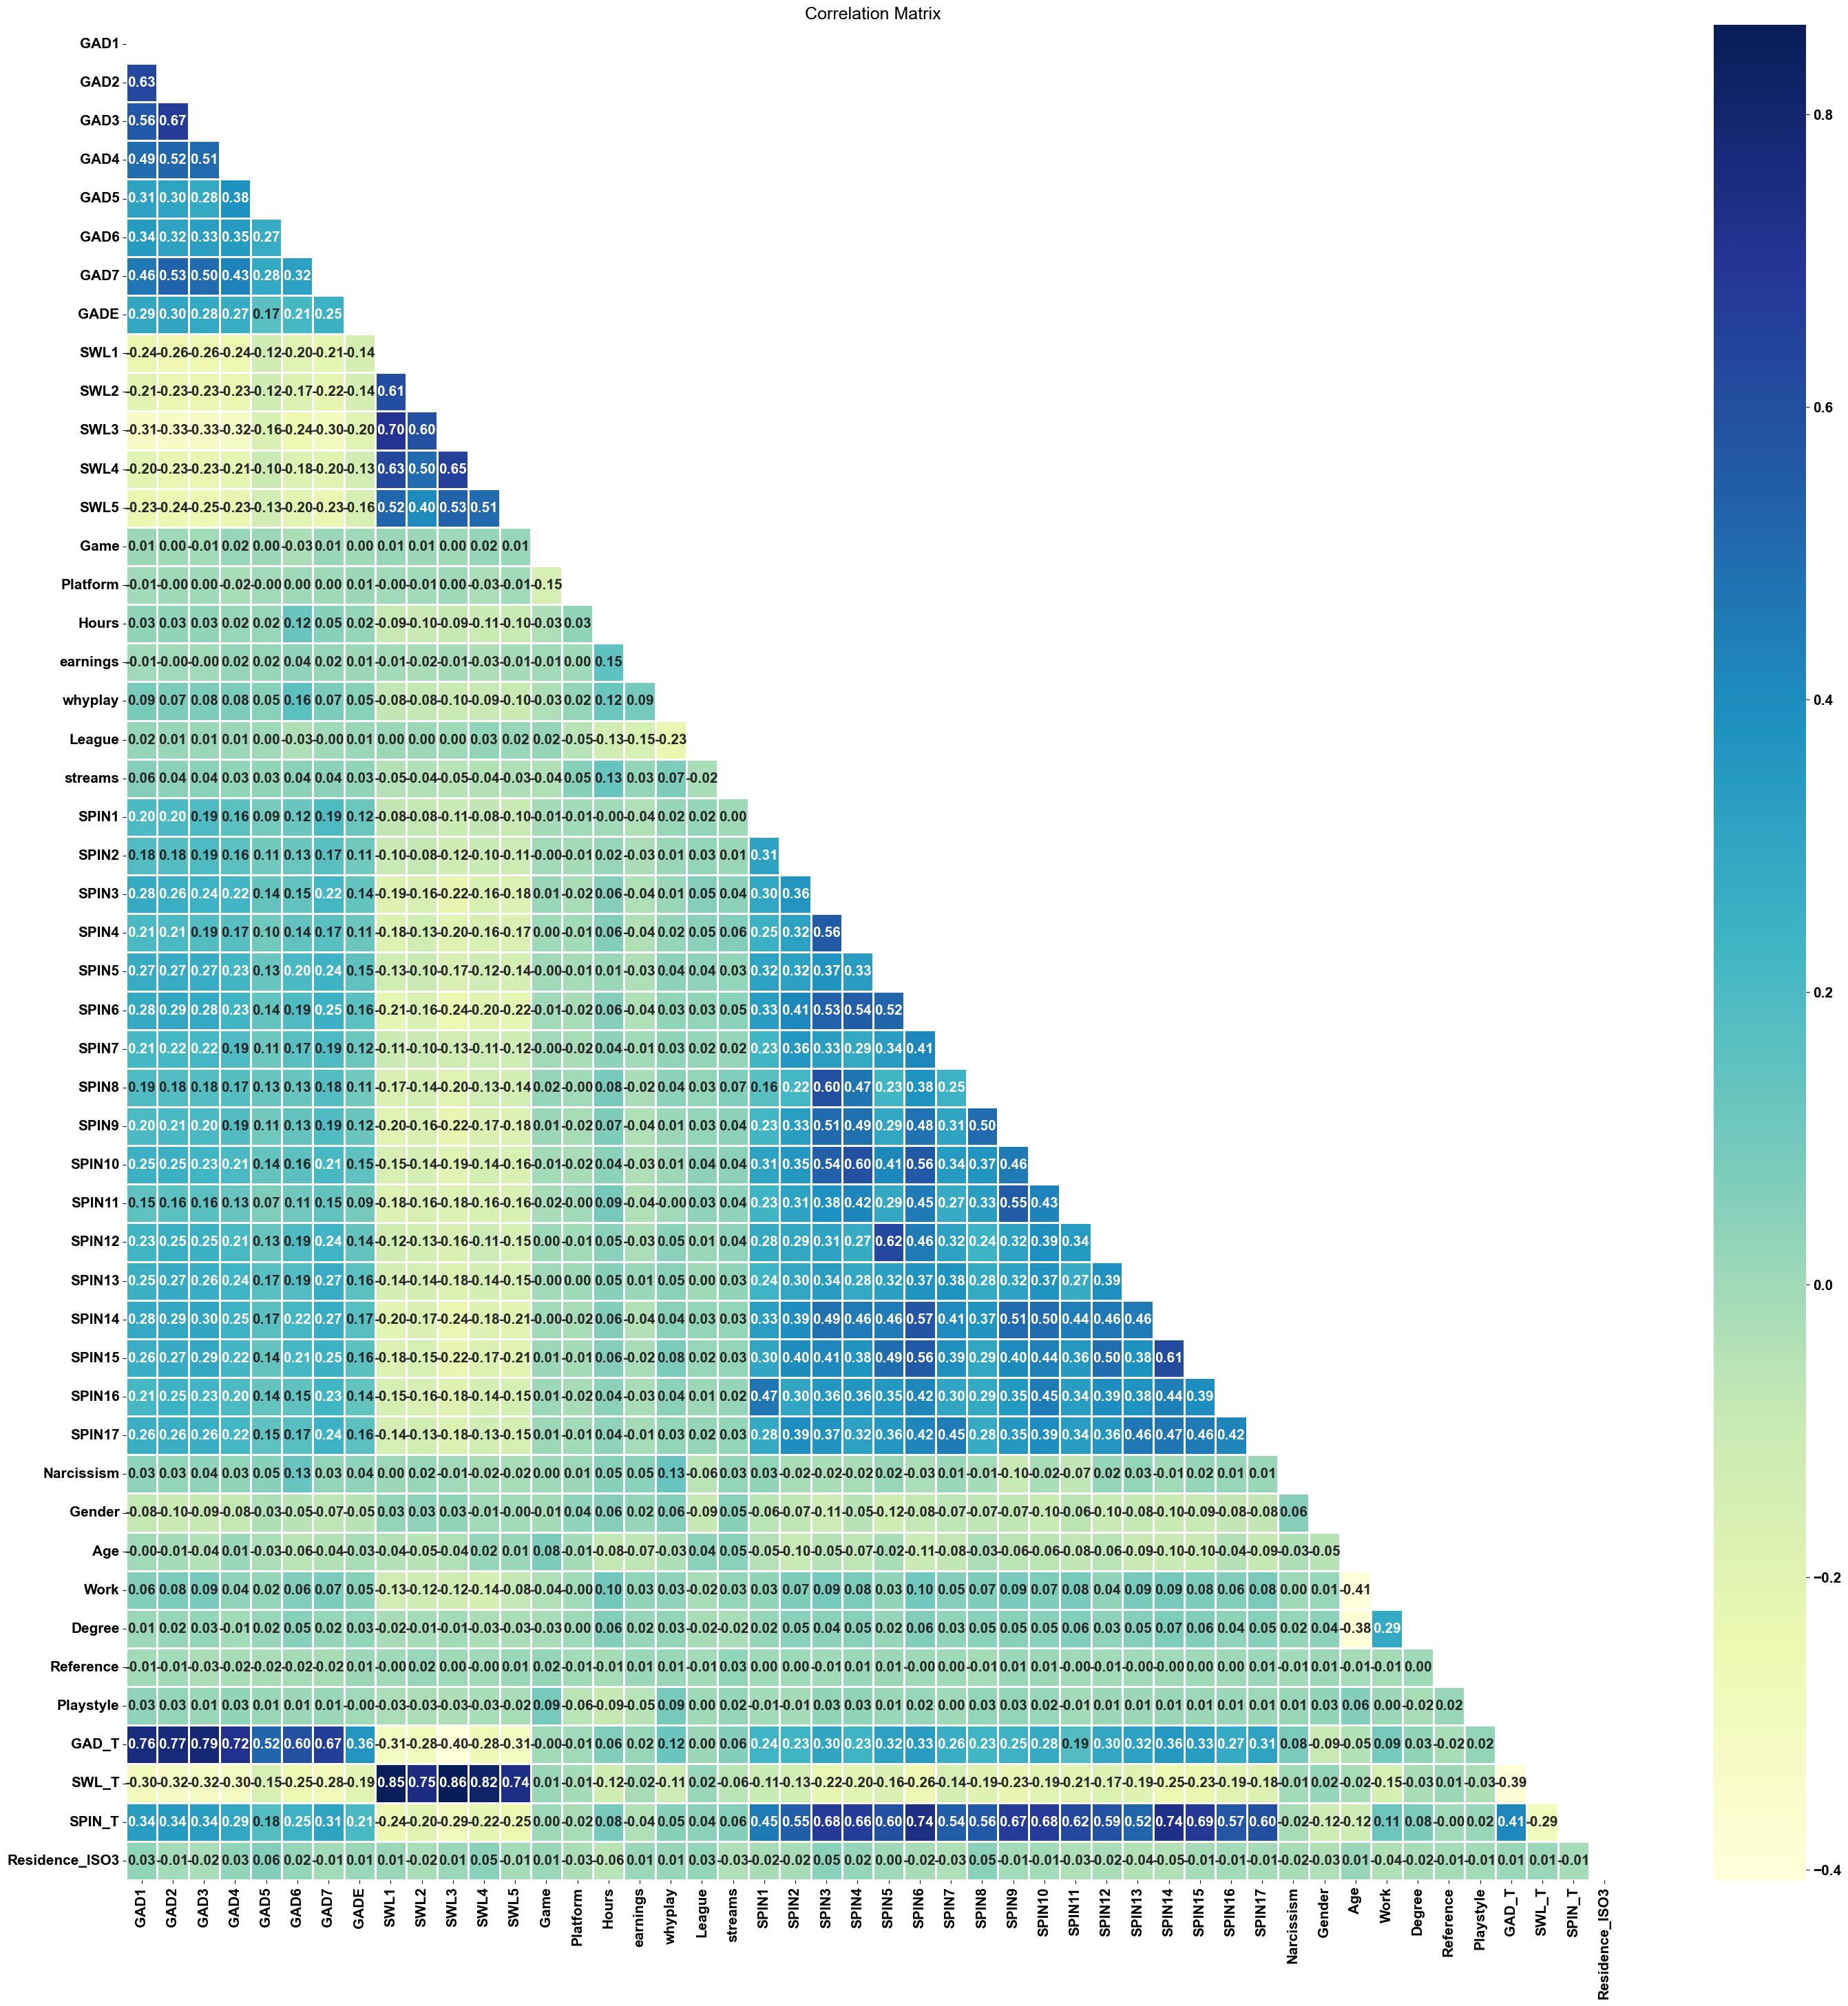

In [323]:
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [324]:
data.head(1)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  ...  Gender  \
0     0     0     0     0     1     0     0     1     3     5  ...       1   

        Age  Work  Degree  Reference  Playstyle     GAD_T  SWL_T    SPIN_T  \
0  0.155556     3       0          2          4  0.047619    0.6  0.073529   

   Residence_ISO3  
0             102  

[1 rows x 48 columns]

In [325]:
 #data.drop(['Hours','streams','Residence_ISO3' , 'Reference' , 'League' , 'GAD_T' , 'SWL_T' , 'SPIN_T'],axis=1,inplace=True)

In [326]:
data1 = data[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
data2 = data[[ 'Age' ,  'Hours' , 'streams' ]]

In [327]:
from sklearn.decomposition import PCA
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)

In [328]:
x1 = pc1.fit_transform(data1)
x2 = pc2.fit_transform(data2)

In [329]:
x = x1 + x2

Elbow method to determine number of clusters

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_k

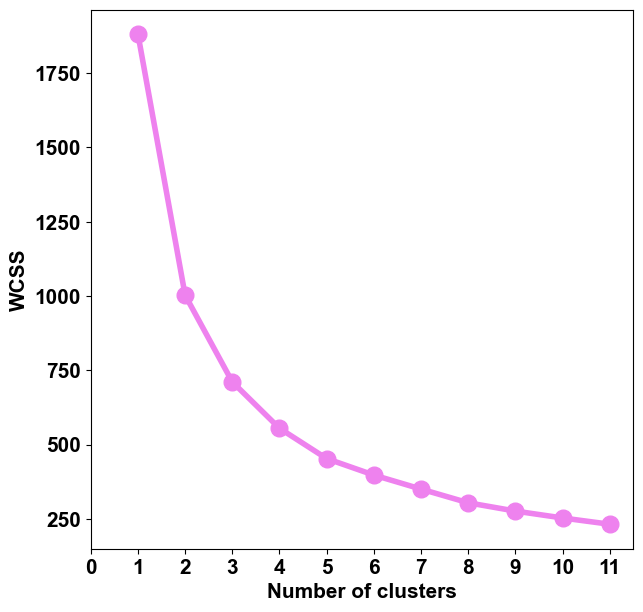

In [330]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),WCSS, linewidth=4, markersize=12,marker='o',color = 'violet')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Clustering to 3 different groups

In [331]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

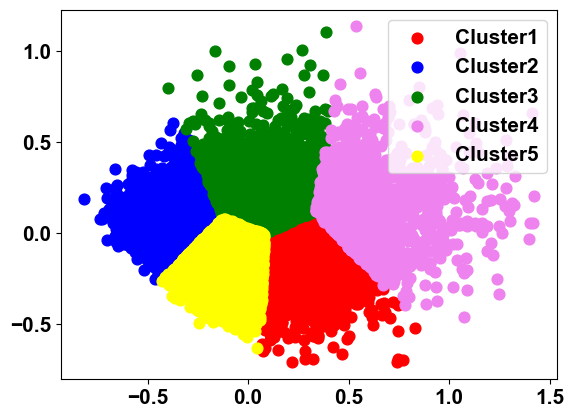

In [332]:
plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 

plt.legend()
plt.show()

Adding label column to train our model for predicting in which group you are

In [333]:
data['Label'] = y_clusters

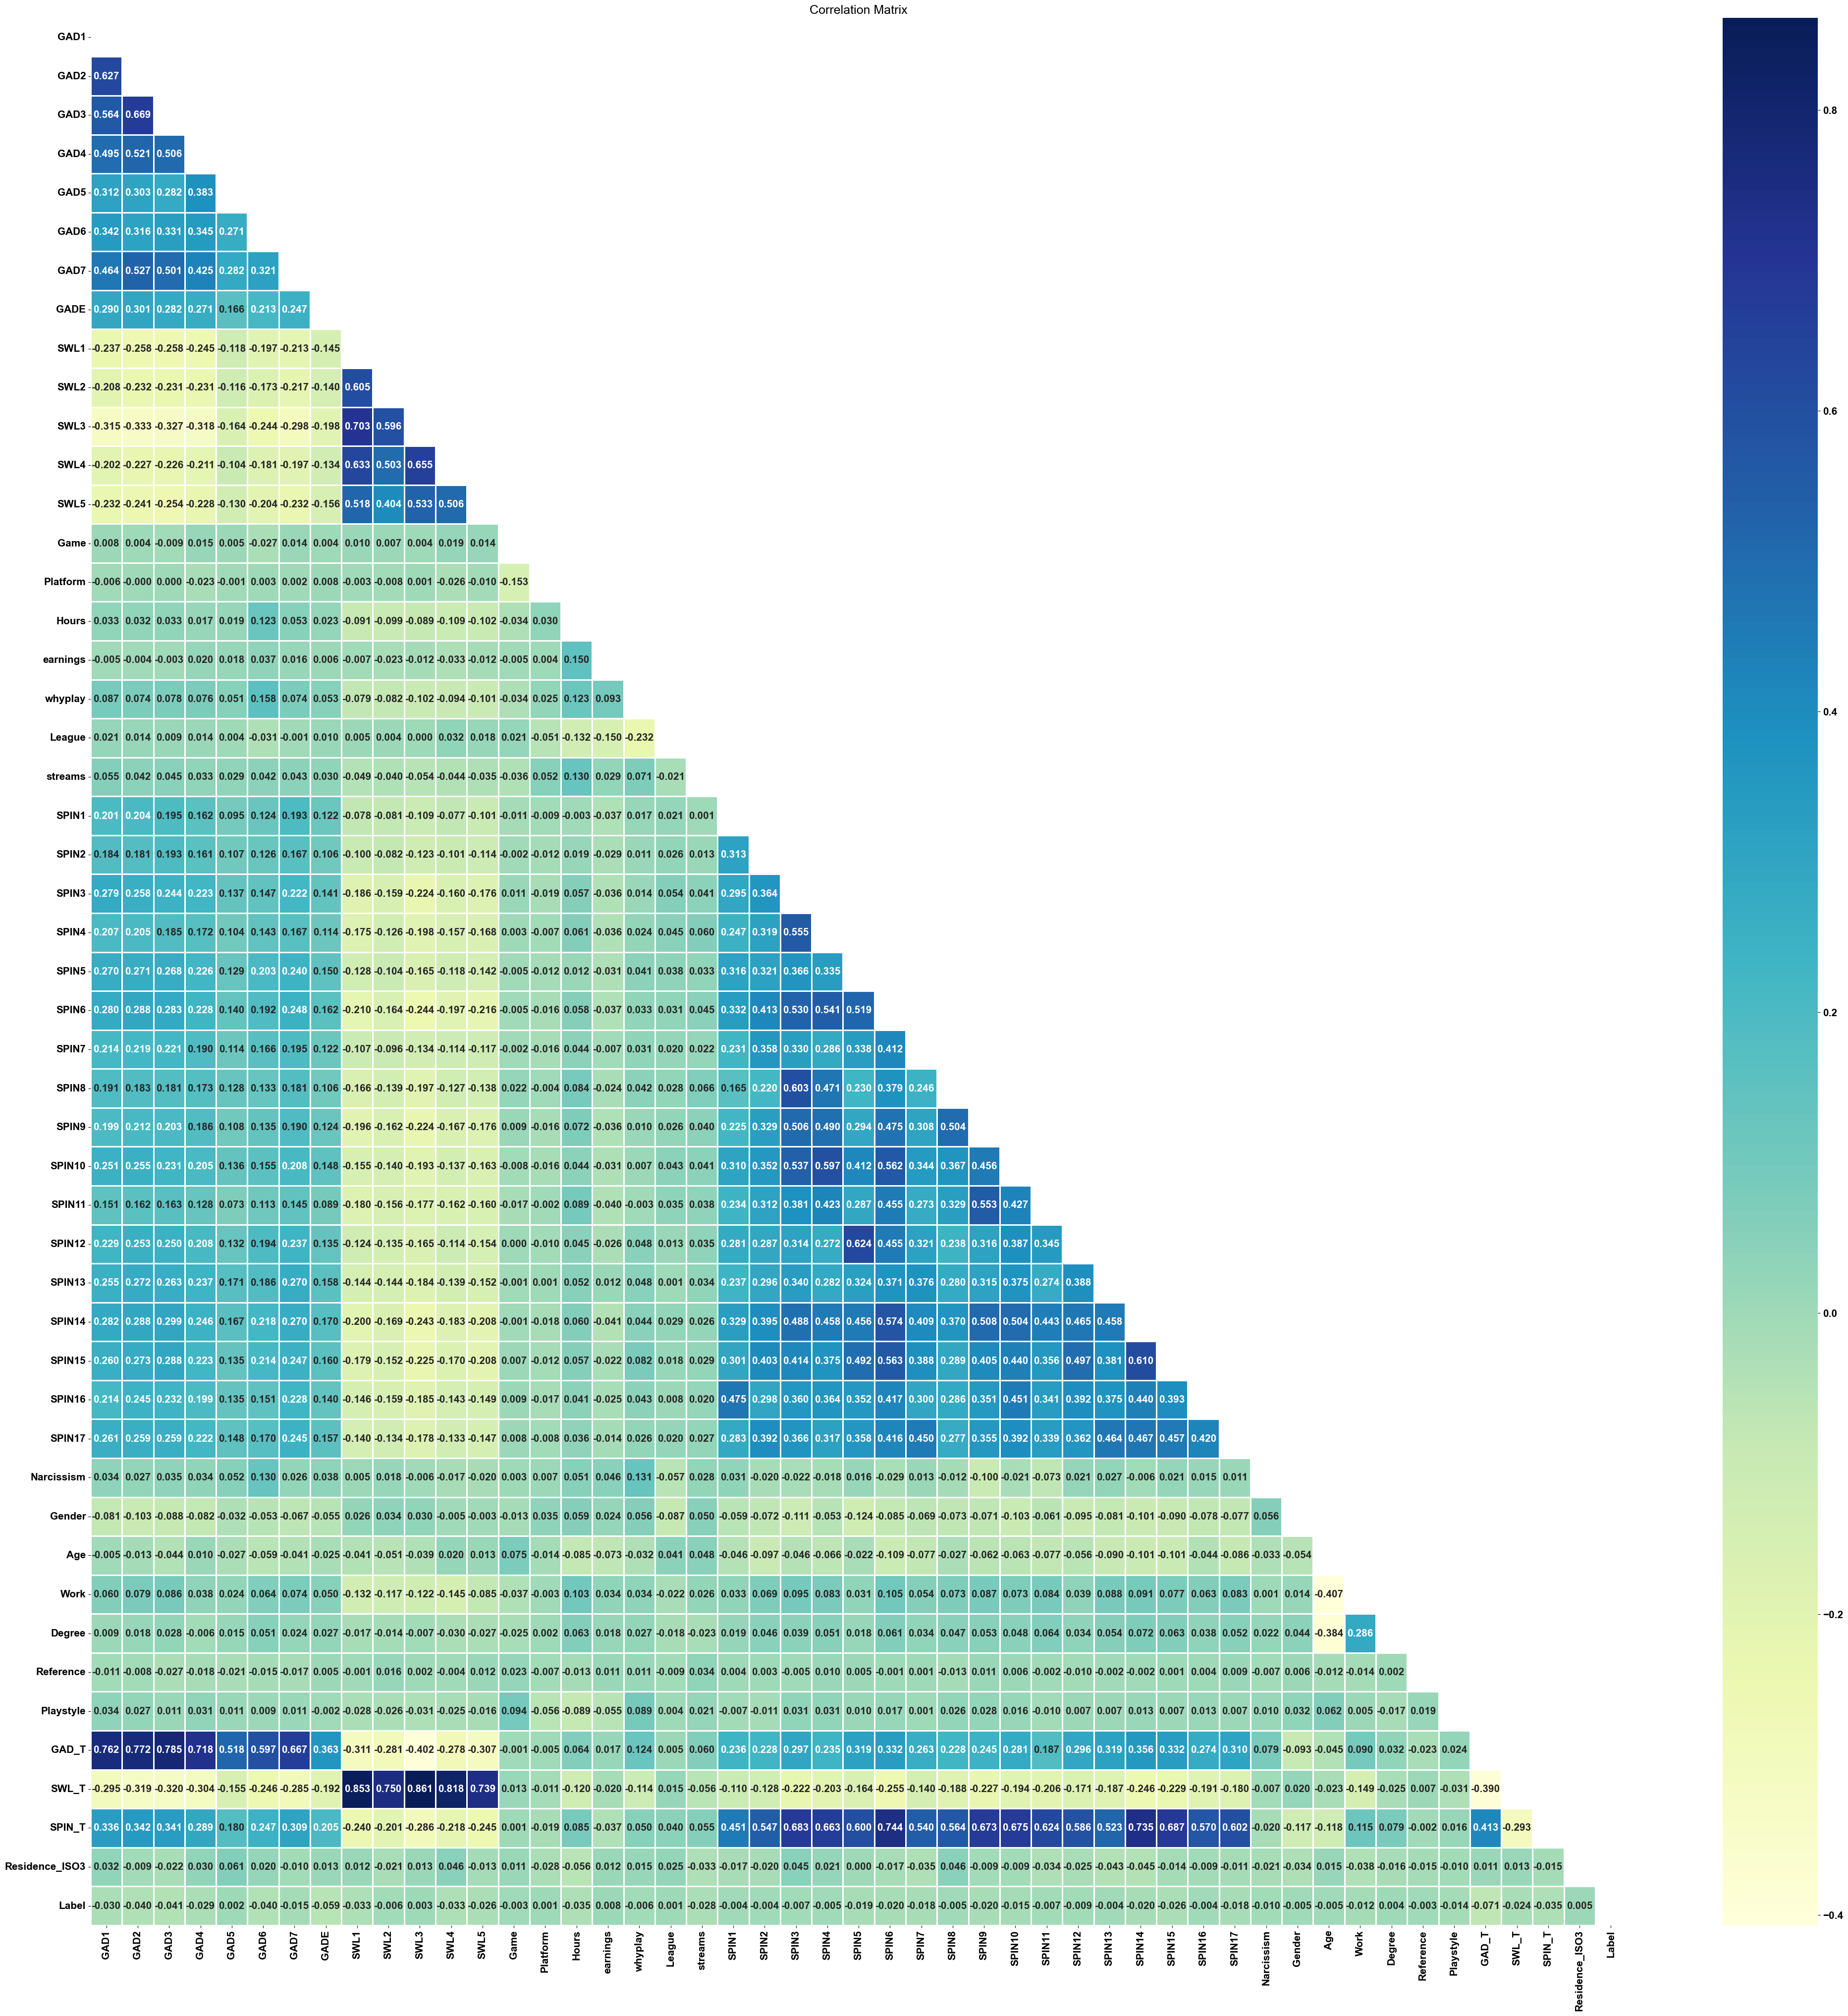

In [334]:
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (50, 50))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".3f")
cormat.set_title('Correlation Matrix')
plt.show()

Checking if our data is unbalanced

In [335]:
plt.rcParams.update({'font.size': 12})

In [336]:
data['Label'].value_counts()

4    3245
1    3215
0    2360
2    1992
3    1269
Name: Label, dtype: int64

In [337]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Splitting data to train and test

In [338]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

Random forest classification modelling

In [339]:
clf = RandomForestClassifier(n_estimators = 1000 , random_state=44, max_depth=8) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [340]:
clf.score(X_test,y_test)

0.8196110881257758

In [341]:
clf.score(X_train,y_train)

0.8713783112582781

In [342]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       496
           1       0.89      0.86      0.87       684
           2       0.72      0.77      0.75       335
           3       0.76      0.96      0.85       214
           4       0.83      0.78      0.81       688

    accuracy                           0.82      2417
   macro avg       0.80      0.83      0.82      2417
weighted avg       0.82      0.82      0.82      2417



In [343]:
confusion_matrix(y_pred,y_test)

array([[395,   0,  29,  41,  31],
       [  3, 586,  36,   0,  59],
       [ 18,  19, 258,  23,  17],
       [  6,   0,   3, 205,   0],
       [ 68,  52,  31,   0, 537]], dtype=int64)